In [1]:
import numpy as np

def remove_i(x, i):
    """Drops the ith element of an array."""
    shape = (x.shape[0]-1,) + x.shape[1:]
    y = np.empty(shape, dtype=float)
    y[:i] = x[:i]
    y[i:] = x[i+1:]
    return y

def a(i, x, G, m):
    """The acelleration of the ith mass."""
    x_i = x[i]
    x_j = remove_i(x, i)
    m_j = remove_i(m, i)
    diff = x_j - x_i
    mag3 = np.sum(diff**2, axis=1)**1.5
    result = G * np.sum(diff * (m_j / mag3)[:,np.newaxis], axis=0)
    return result

def timestep(x0, v0, G, m, dt):
    """Computes the next position and velocity for all masses given 
    a initial conditions and a time step size.
    """
    N = len(x0)
    x1 = np.empty(x0.shape, dtype=float)
    v1 = np.empty(v0.shape, dtype=float)
    for i in range(N):
        a_i0 = a(i, x0, G, m)
        v1[i] = a_i0 * dt + v0[i]
        x1[i] = a_i0 * dt**2 + v0[i] * dt + x0[i]
    return x1, v1

def initial_cond(N, D):
    """Generates initial conditions for N unity masses at rest 
    starting at random positions in D-dimensional space.
    """
    x0 = np.random.rand(N, D)
    v0 = np.zeros((N, D), dtype=float)
    m = np.ones(N, dtype=float)
    return x0, v0, m    

In [20]:
def makefig(x, v, t):
    plt.plot(x[:,0], x[:,1], 'ro')
    if not np.all(v == 0.0):
        plt.quiver(x[:,0], x[:,1], v[:,0], v[:,1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Time t = {0}'.format(t))
    plt.savefig('n-body-t{0}.svg'.format(t))

In [23]:
x0, v0, m = initial_cond(10, 2)
x1, v1 = timestep(x0, v0, 1.0, m, 1.0e-3)

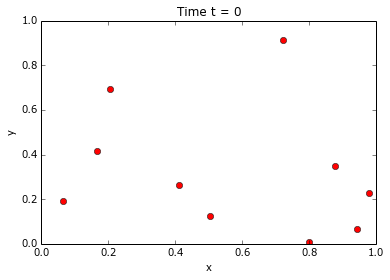

In [24]:
makefig(x0, v0, 0)

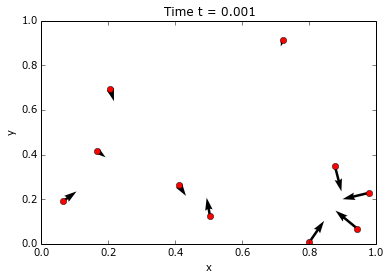

In [25]:
makefig(x1, v1, 1e-3)


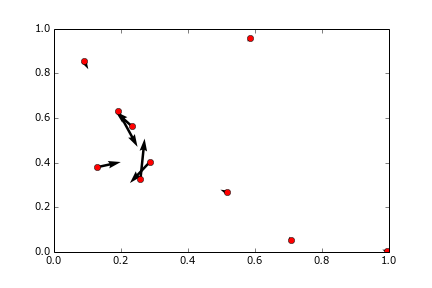
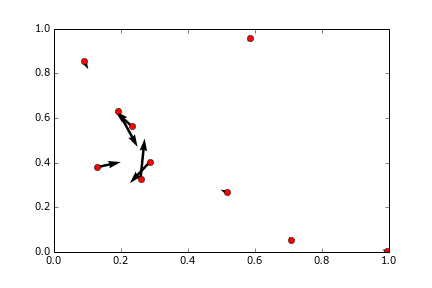
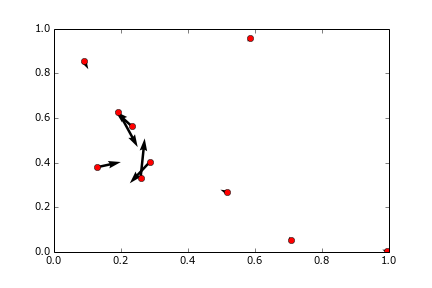
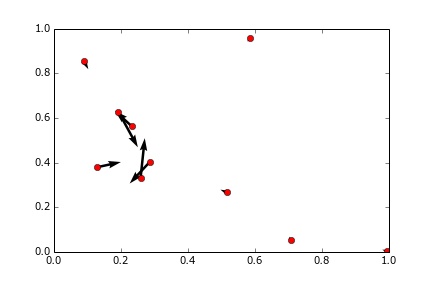
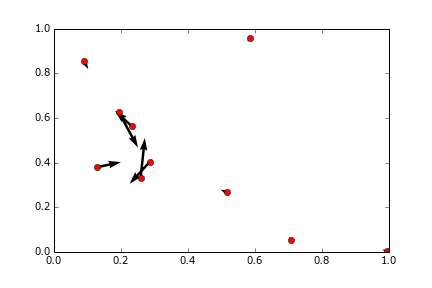
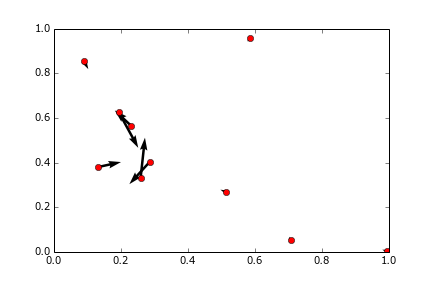
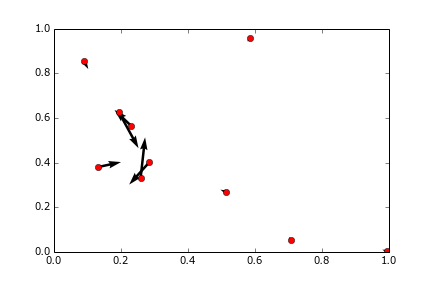
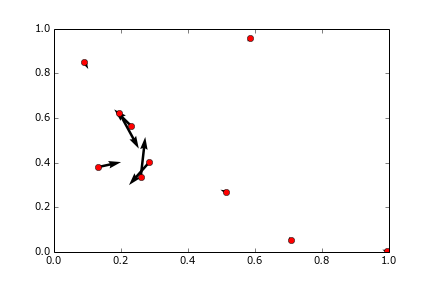
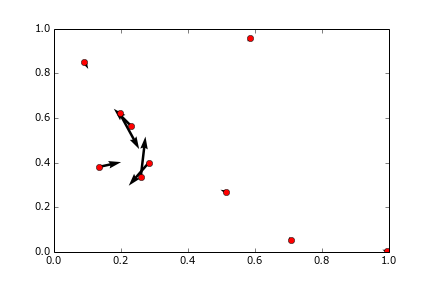
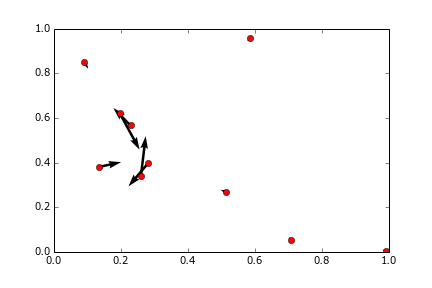
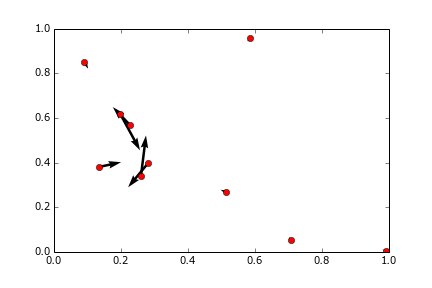
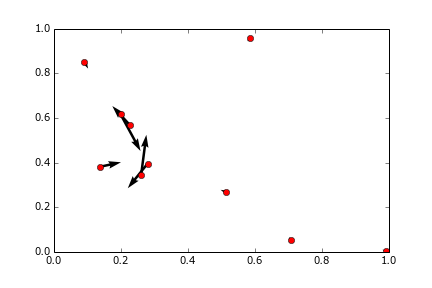
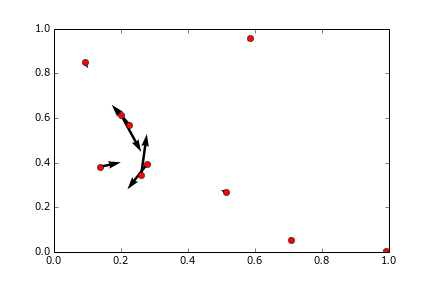
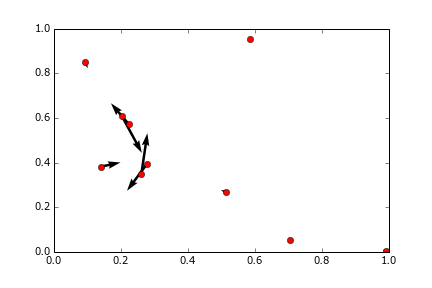
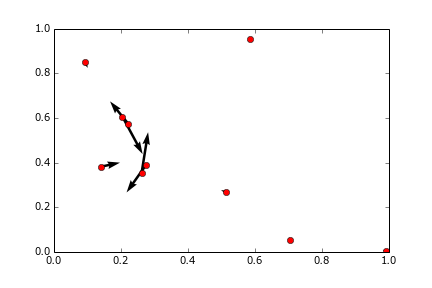
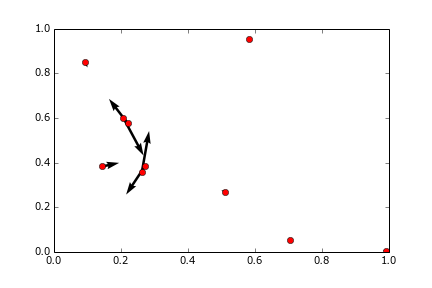
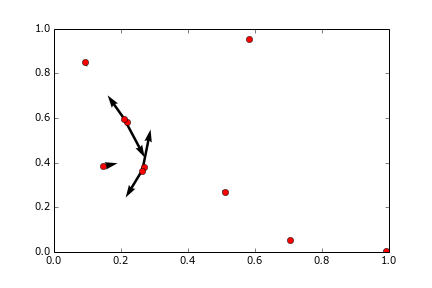
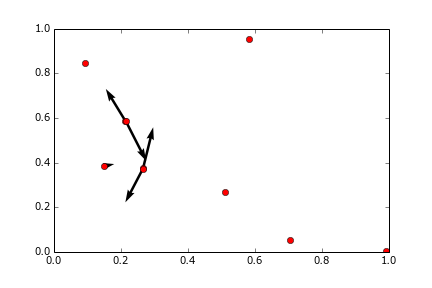
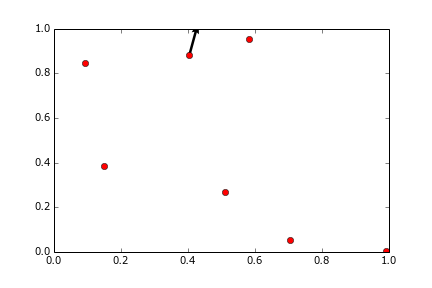
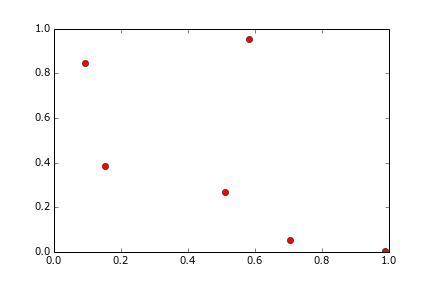
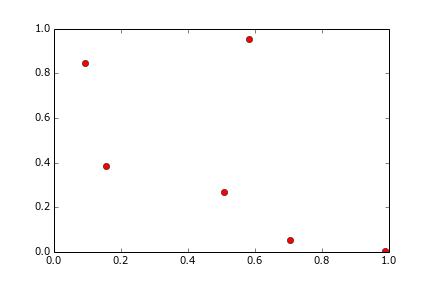
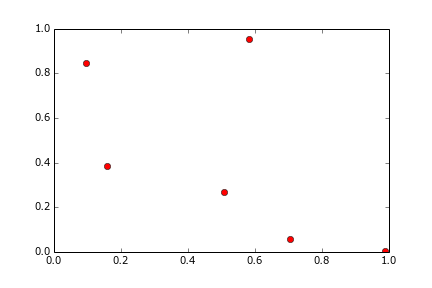
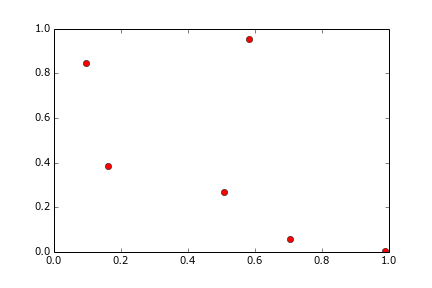
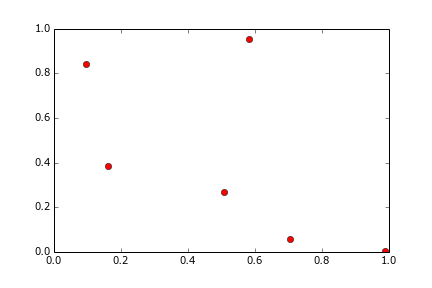
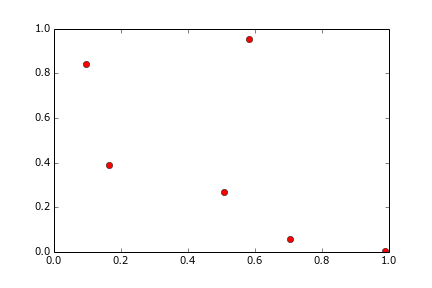
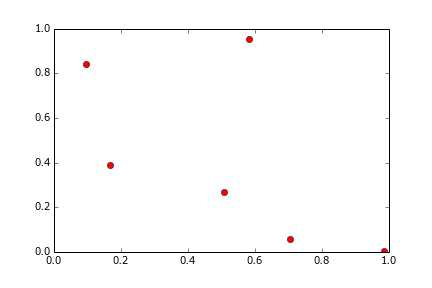
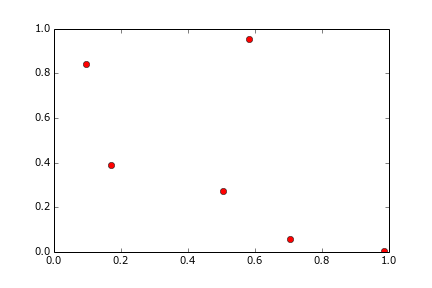
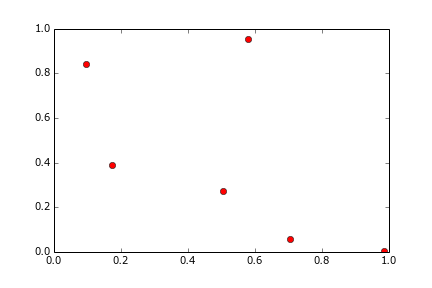
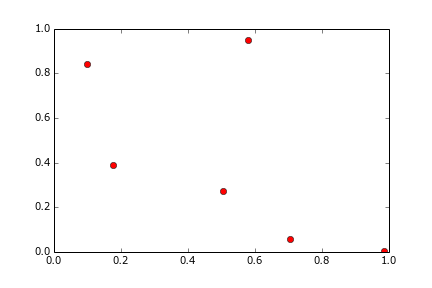
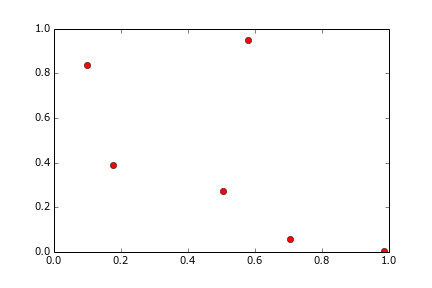
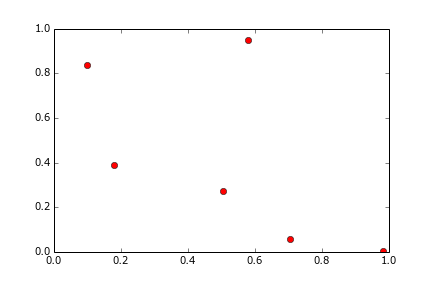
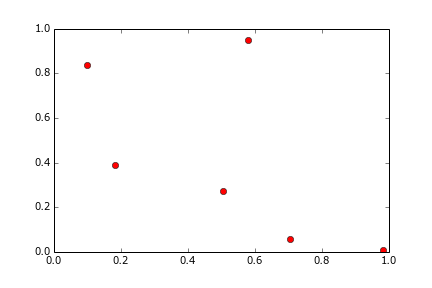
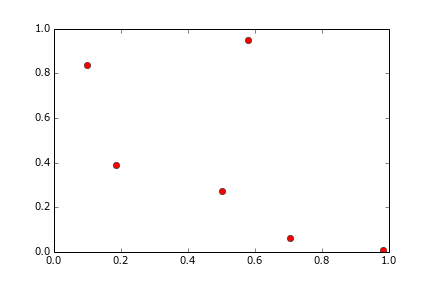
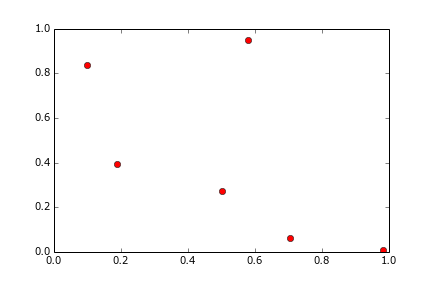
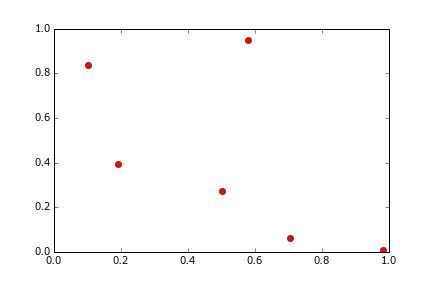
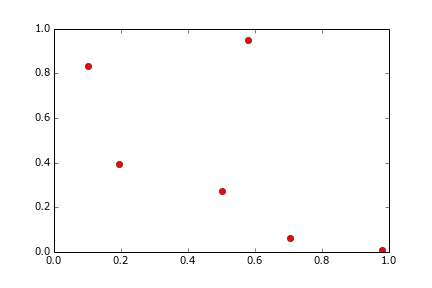
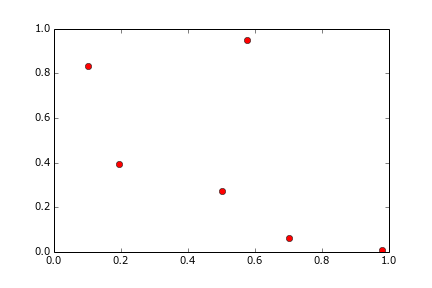
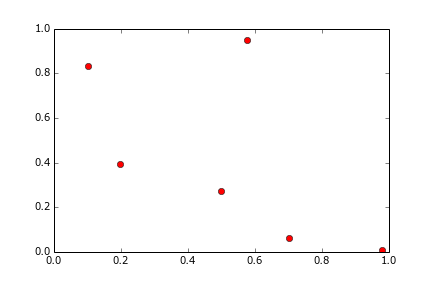
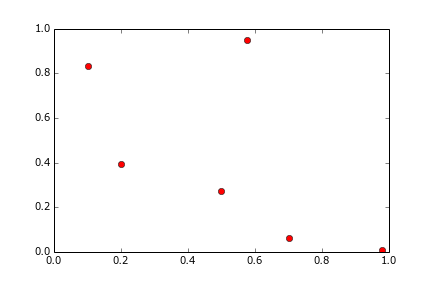
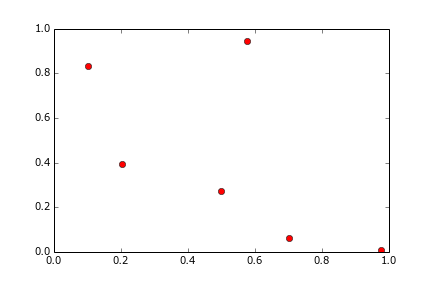
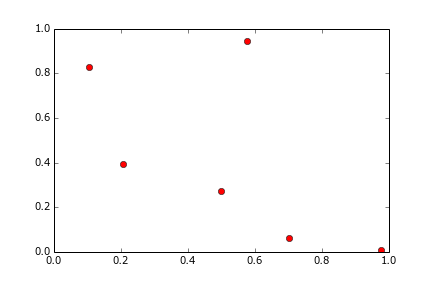
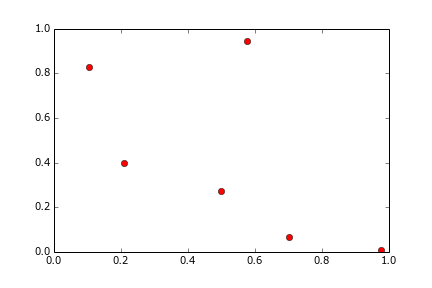
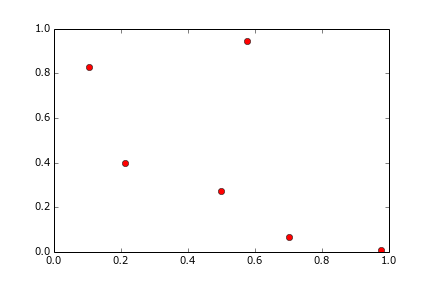
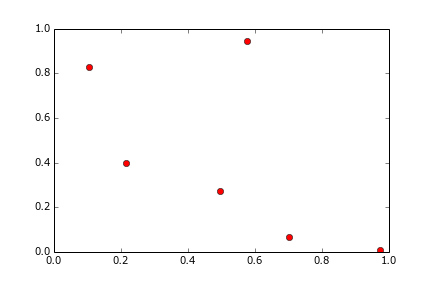
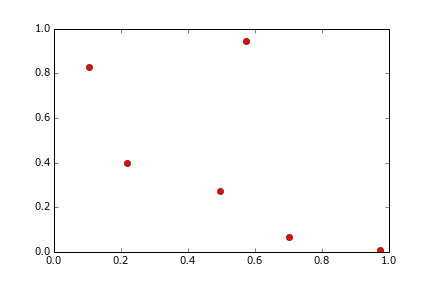
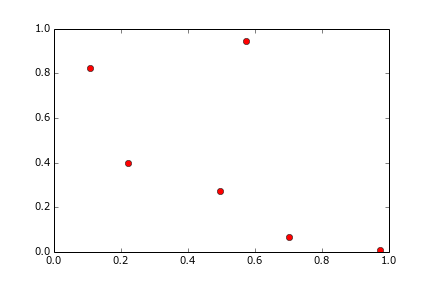
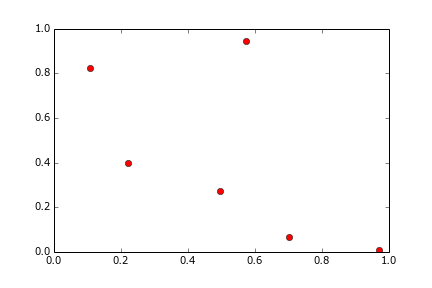
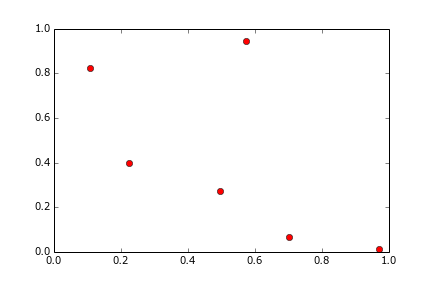
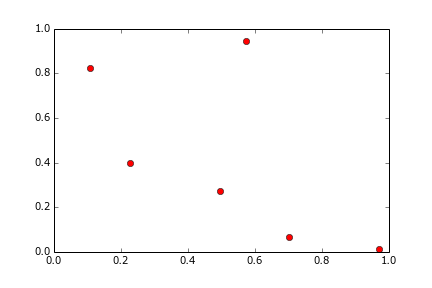
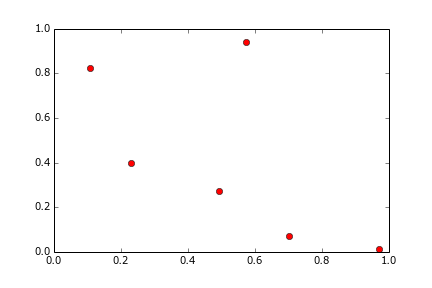
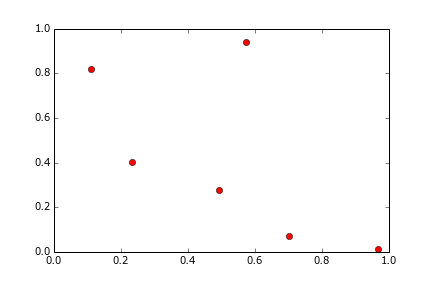
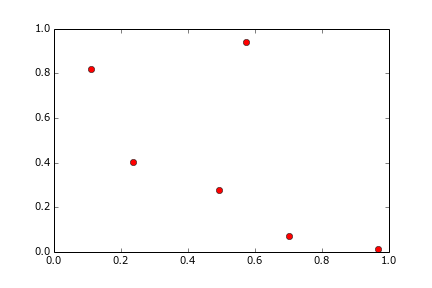
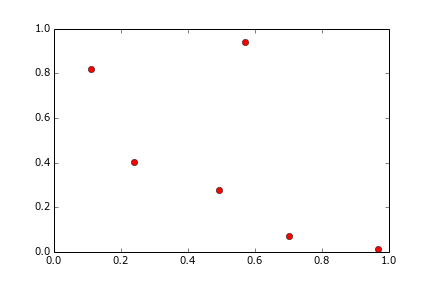
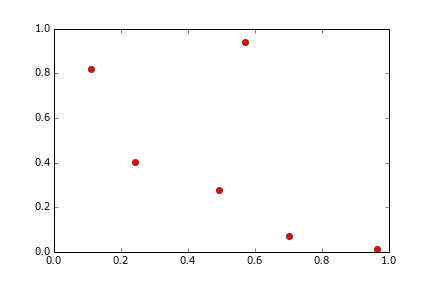
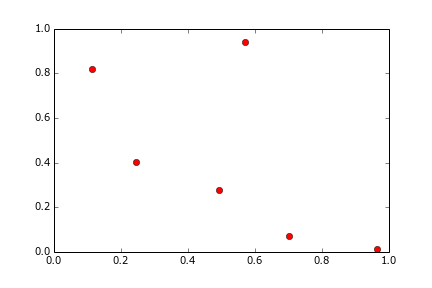
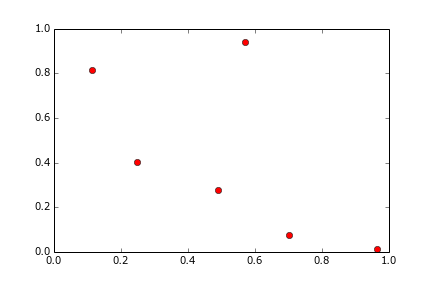
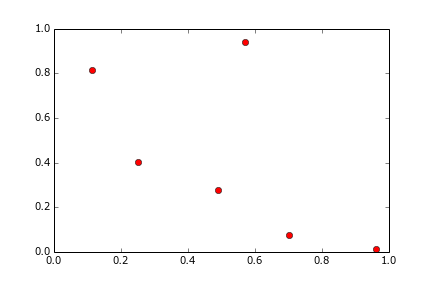
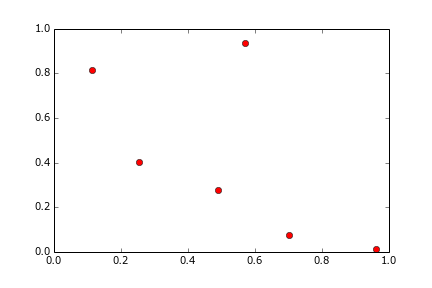
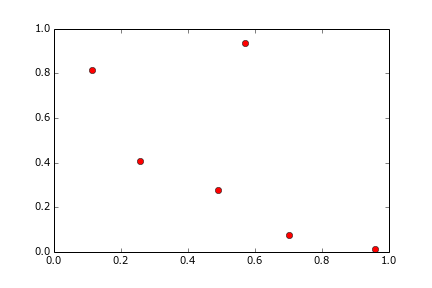
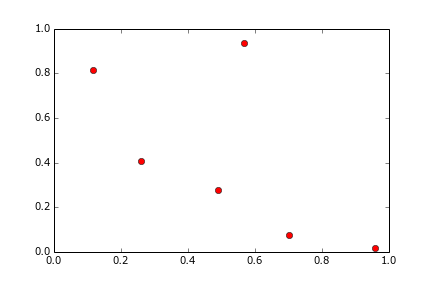
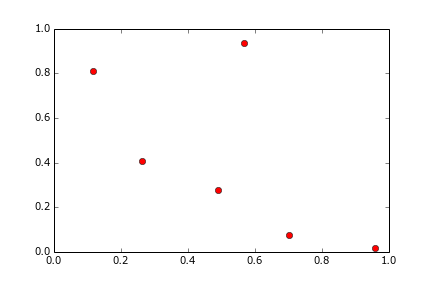
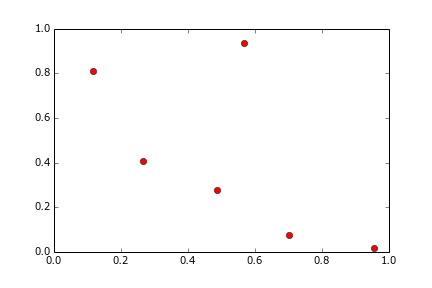
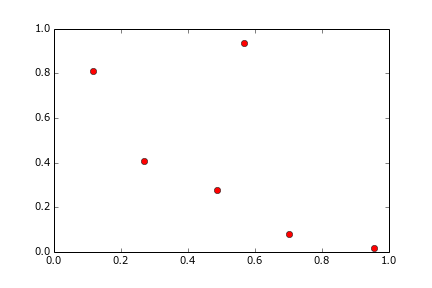
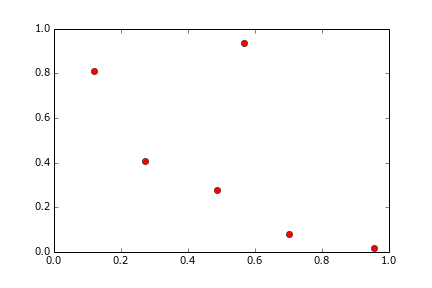
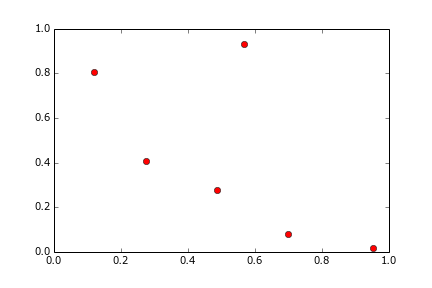
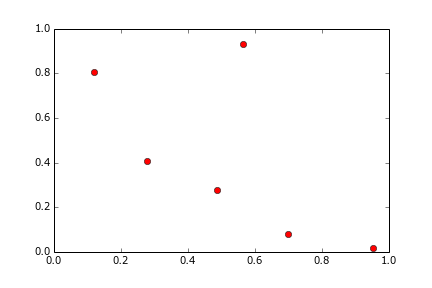
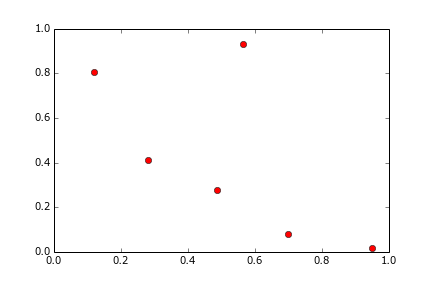
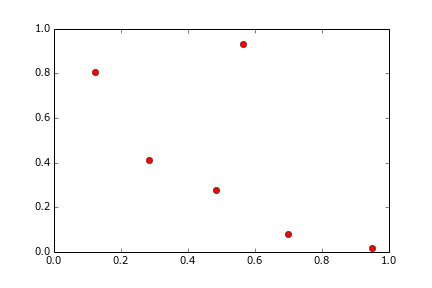
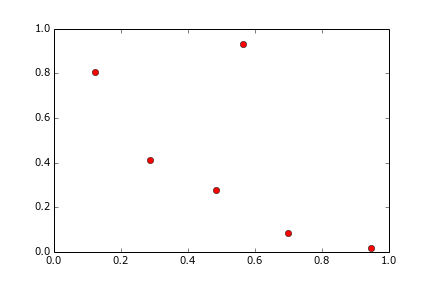
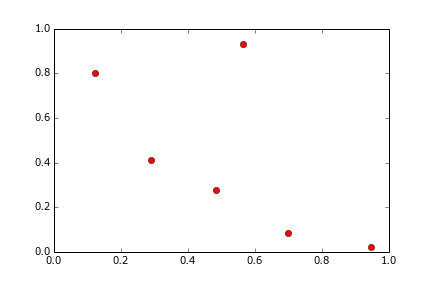
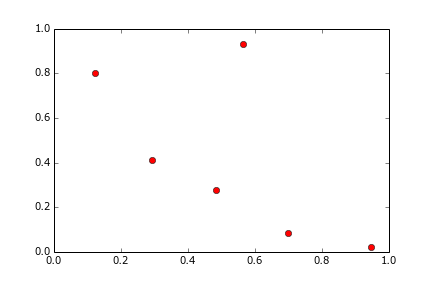
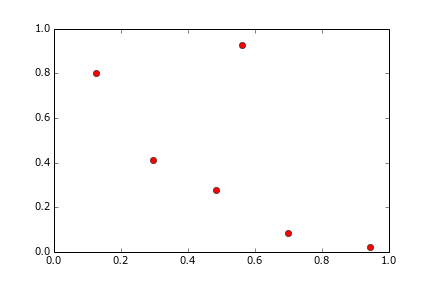
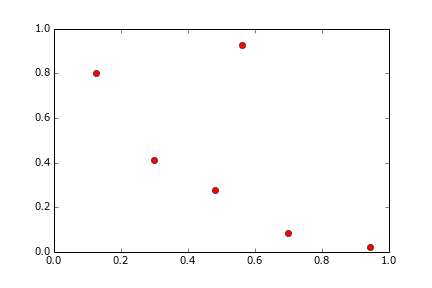
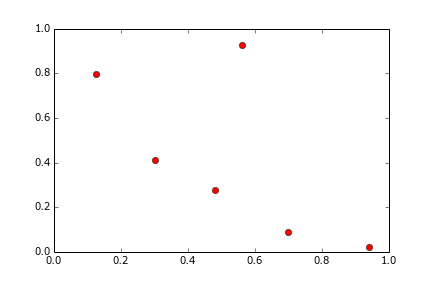
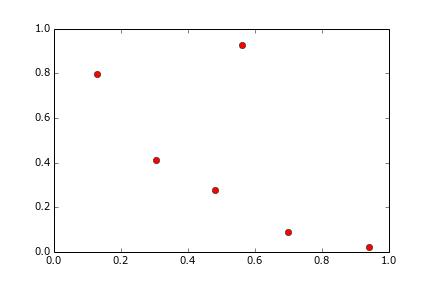
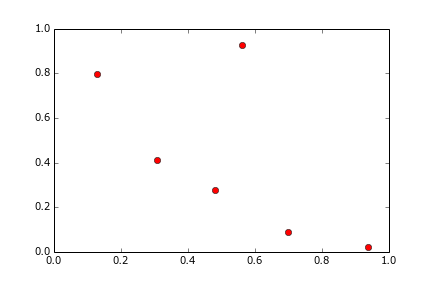
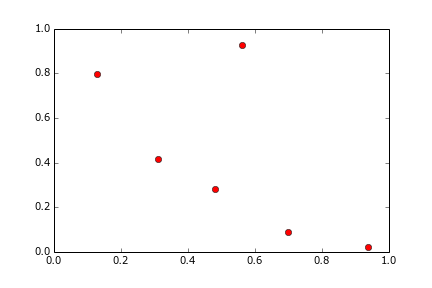
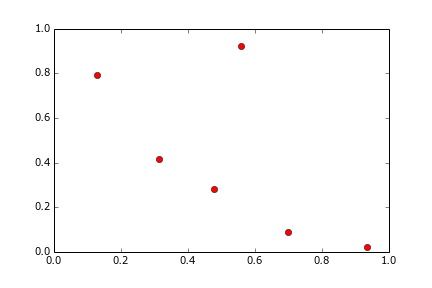
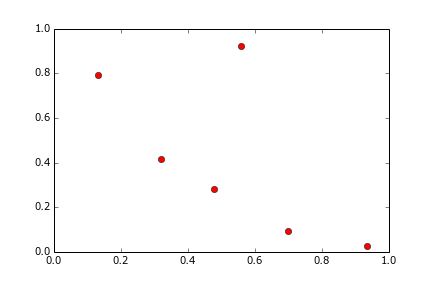
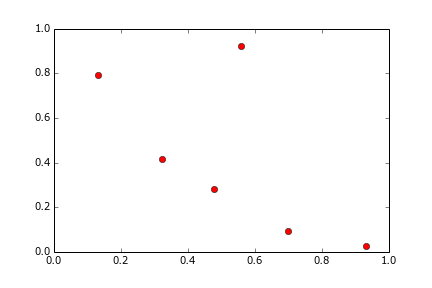
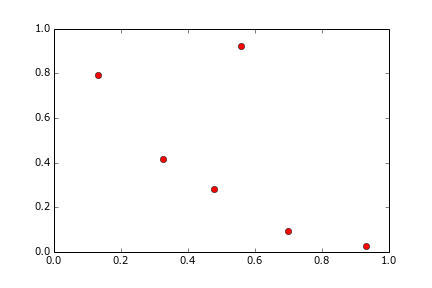
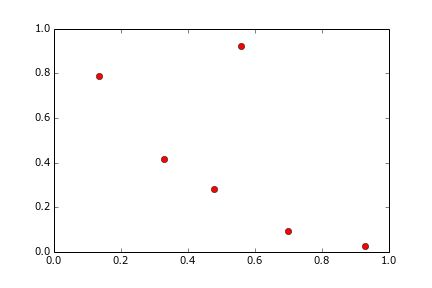
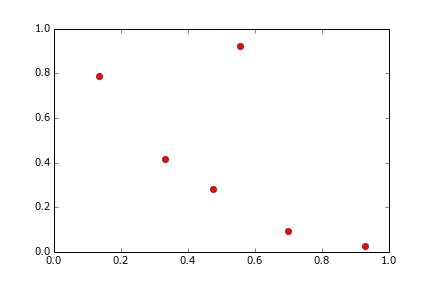
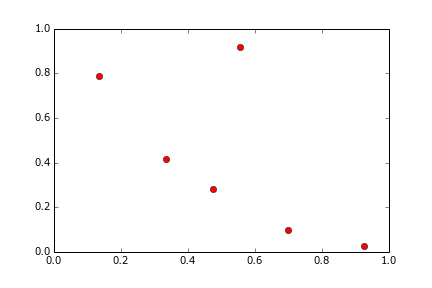
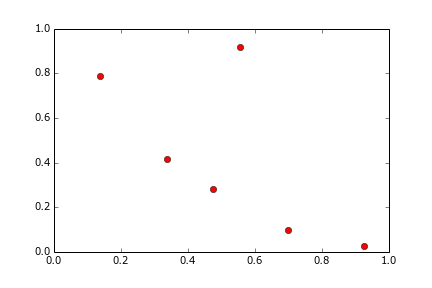
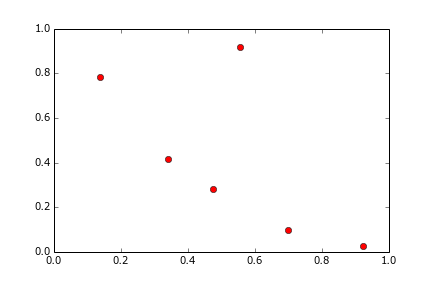
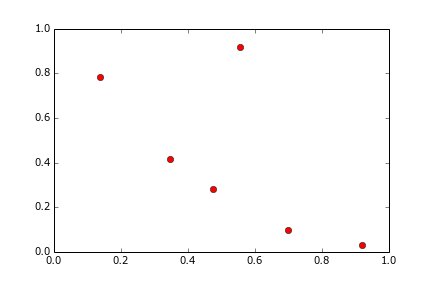
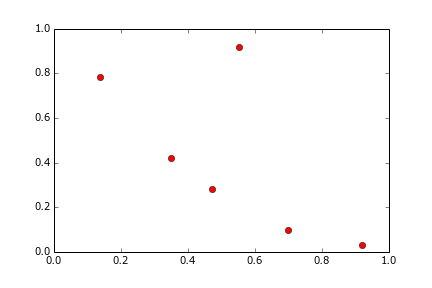
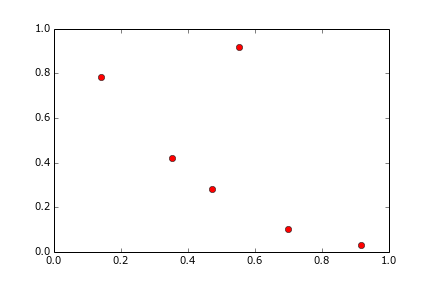
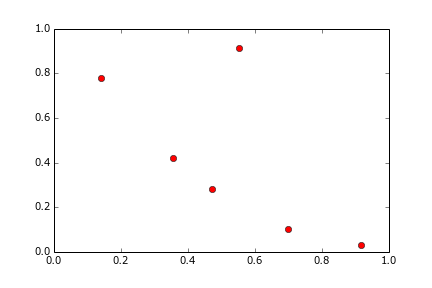
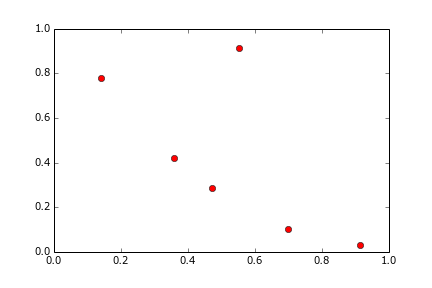
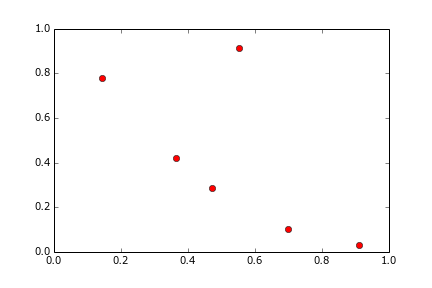
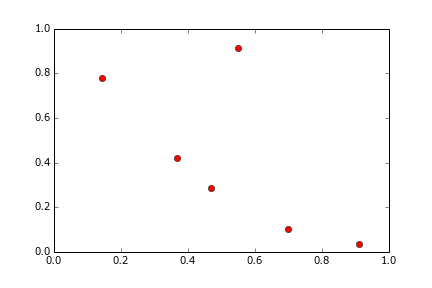
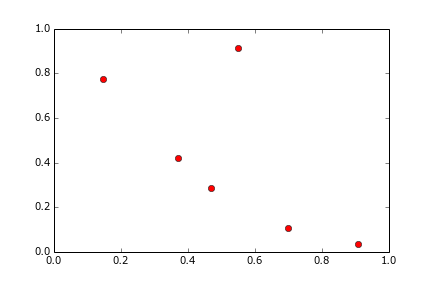
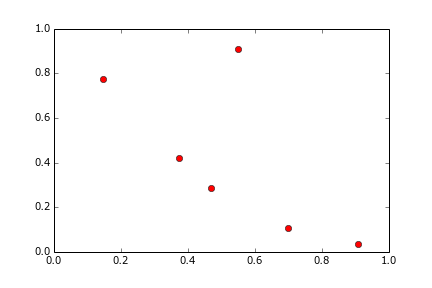
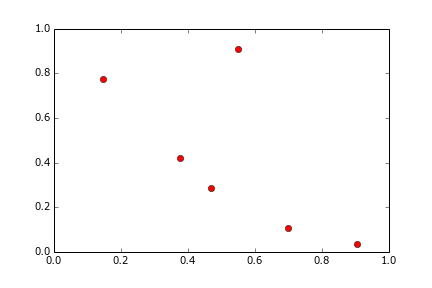
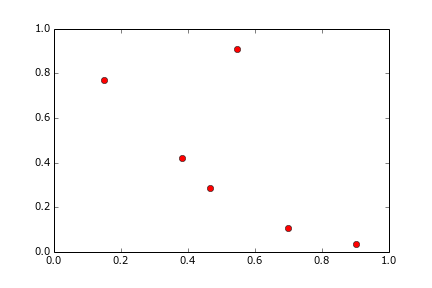
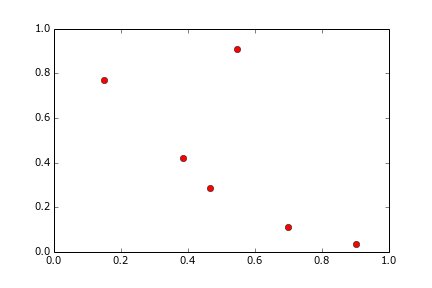
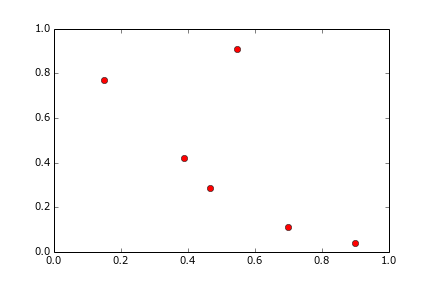
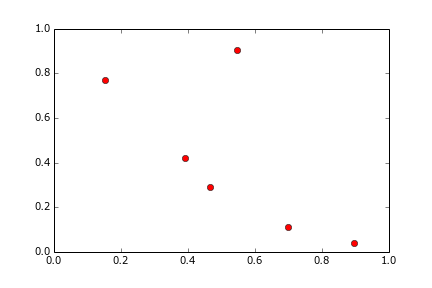
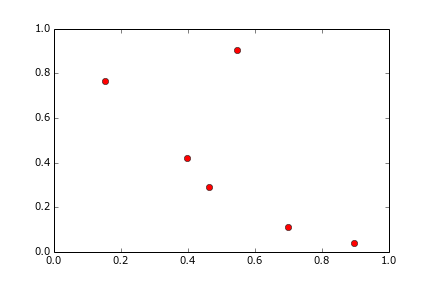
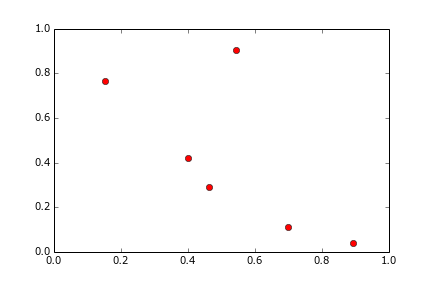
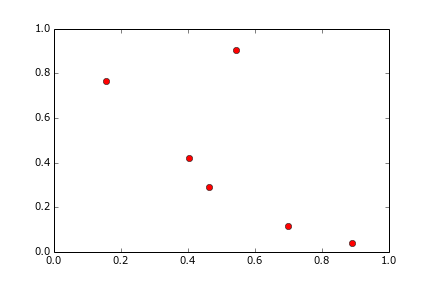
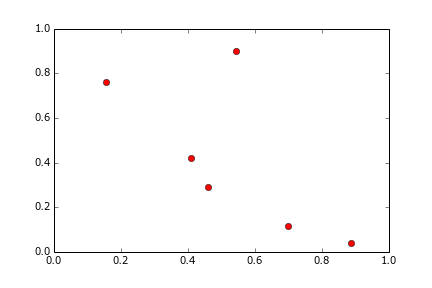
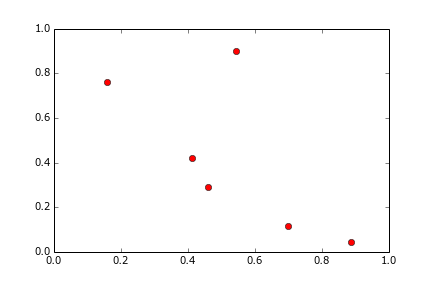
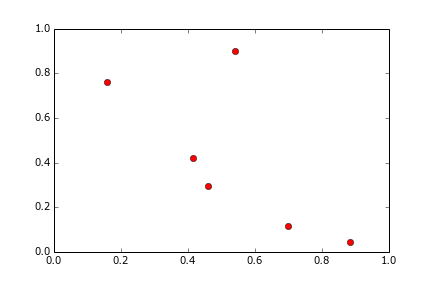
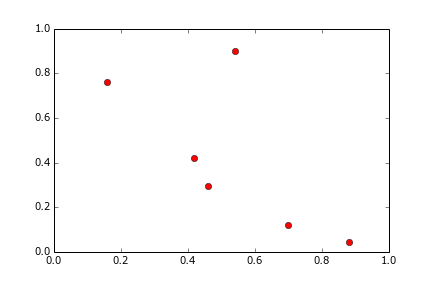
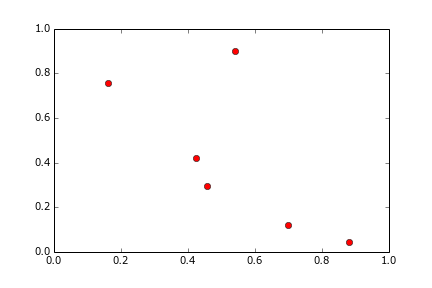
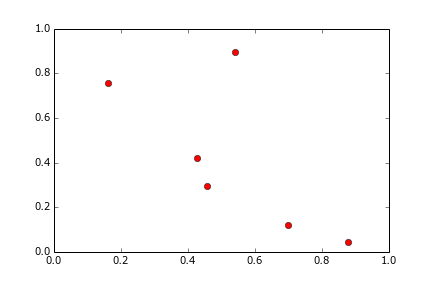
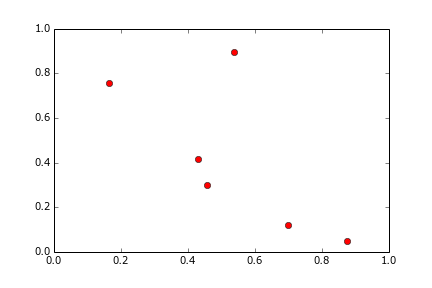
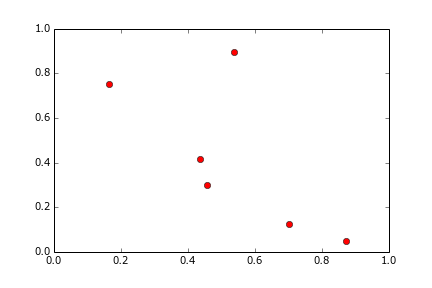
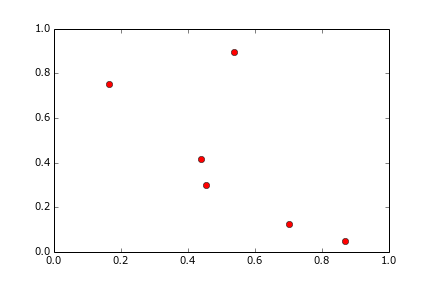
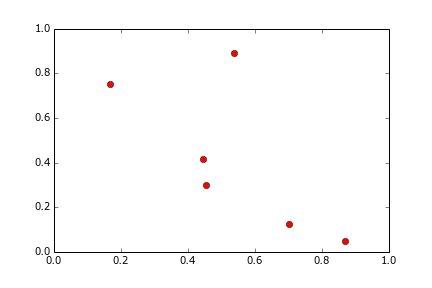
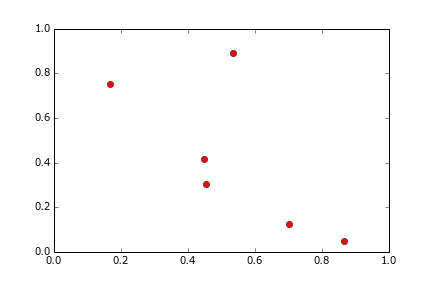
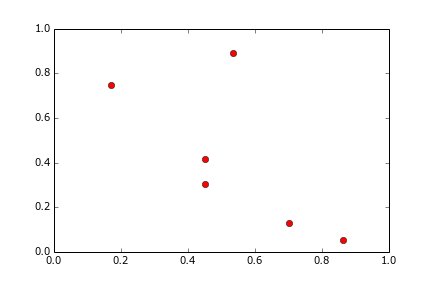
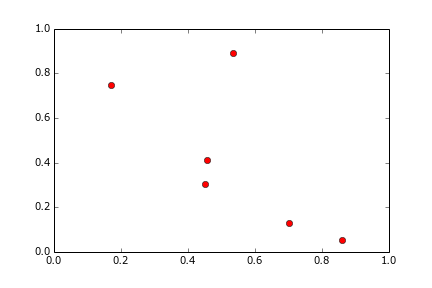
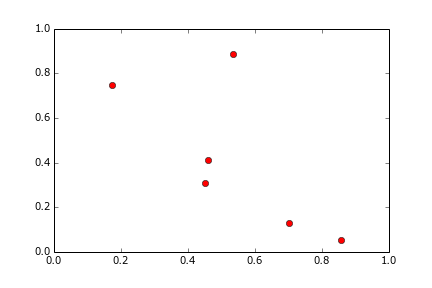
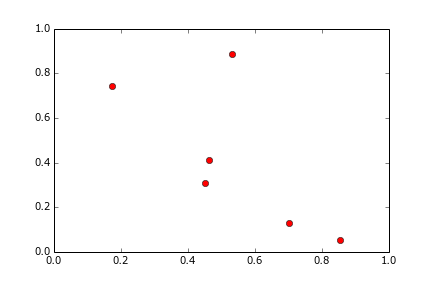
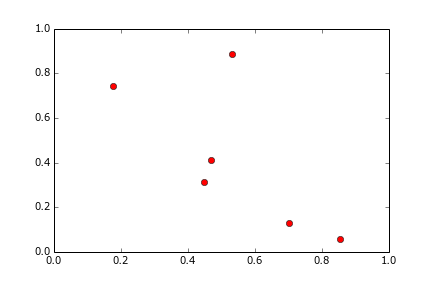
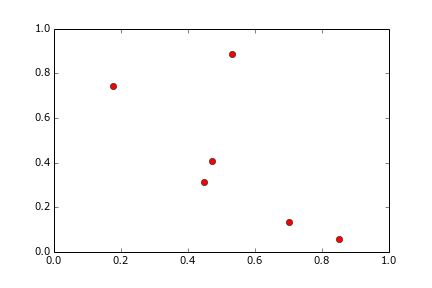
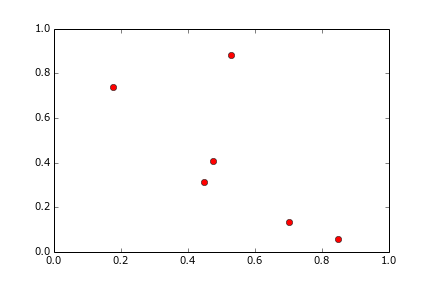
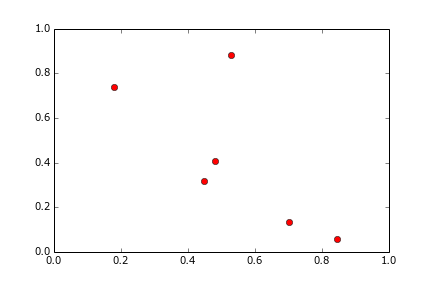
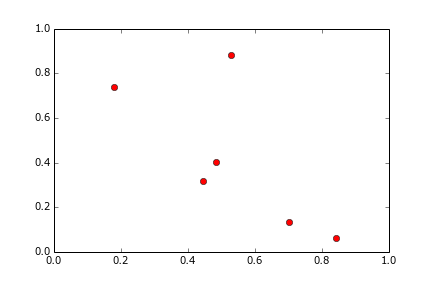
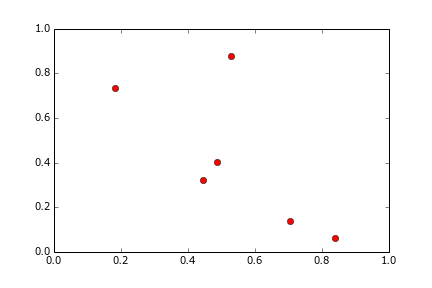
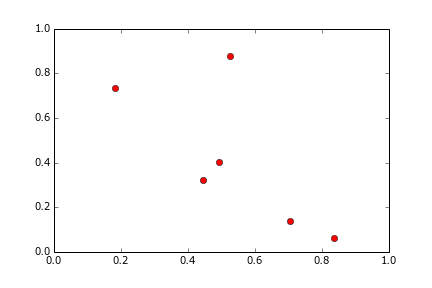
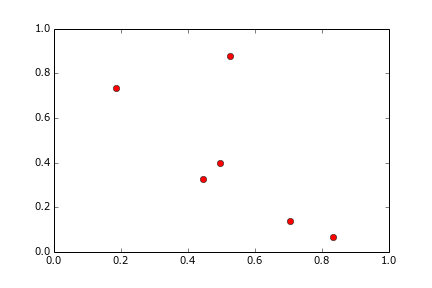
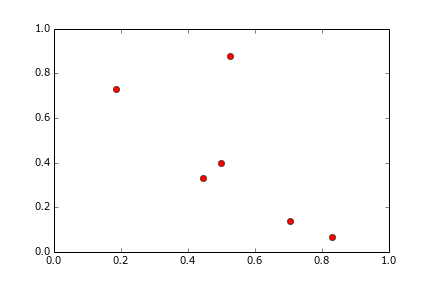
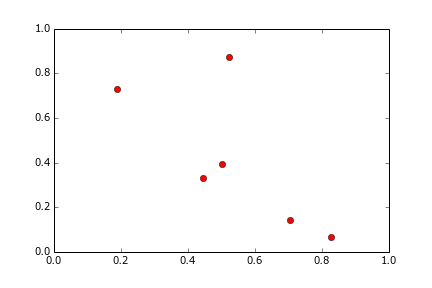
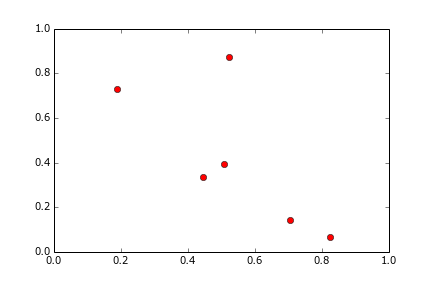
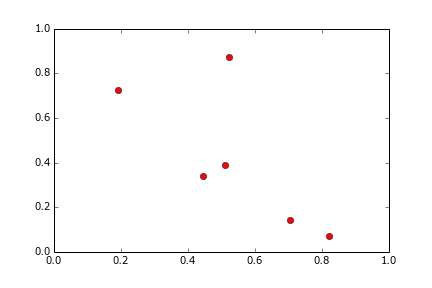
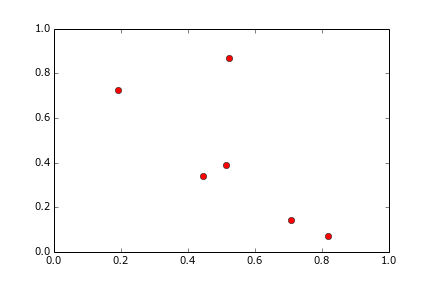
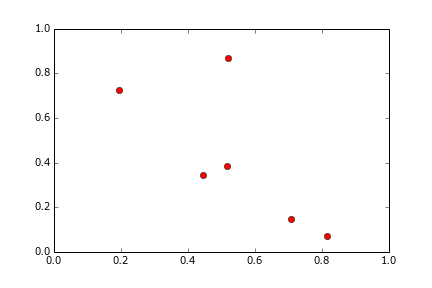
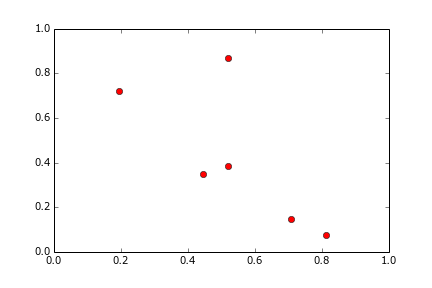
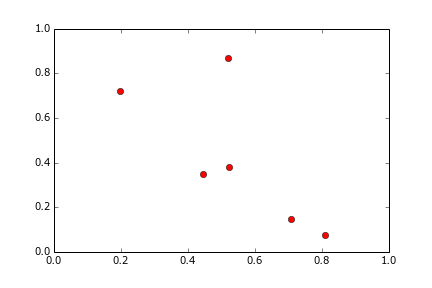
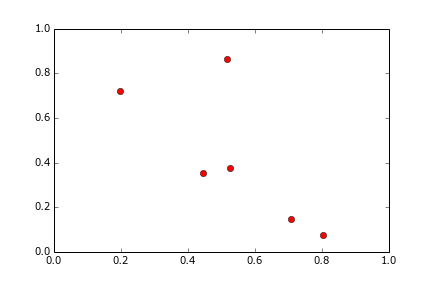
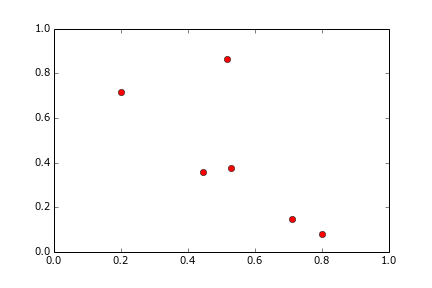
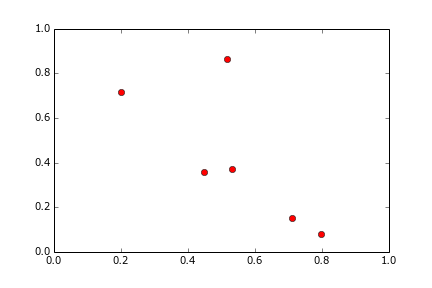
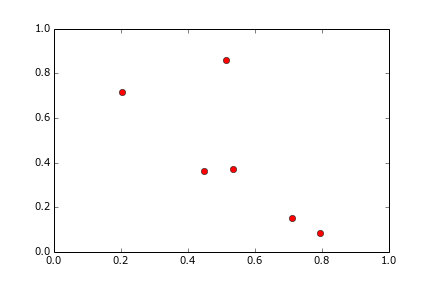
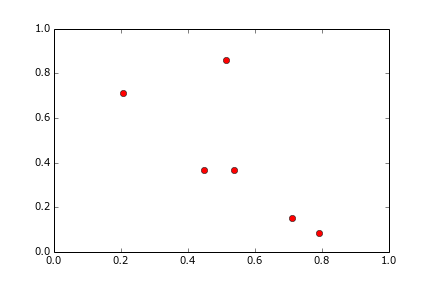
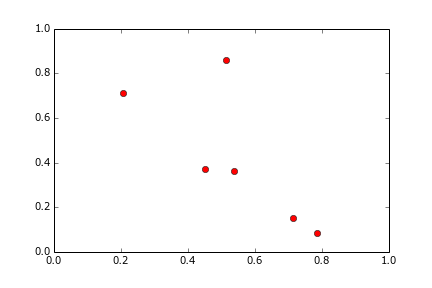
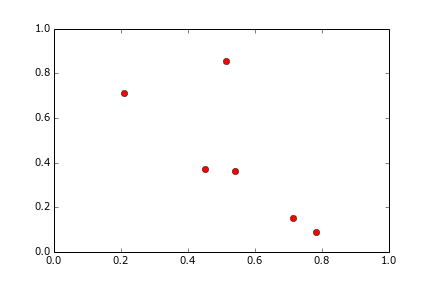
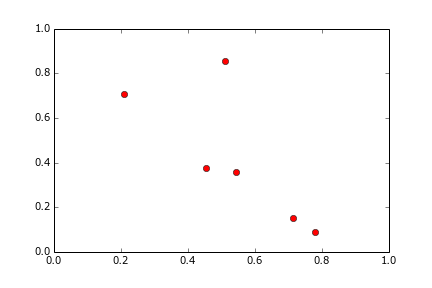
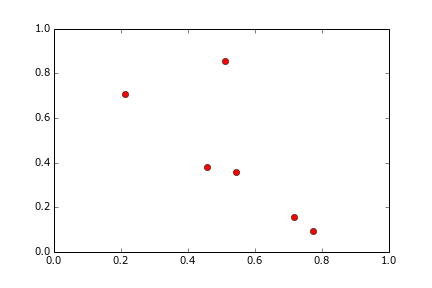
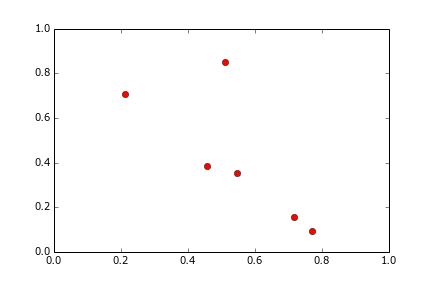
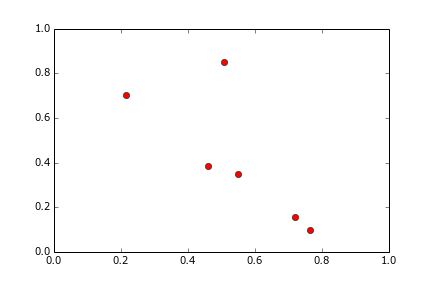
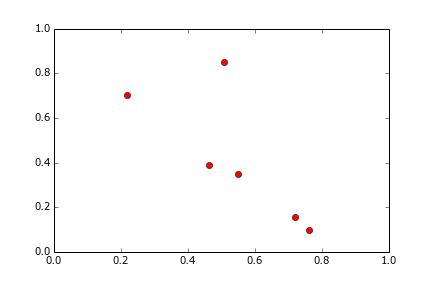
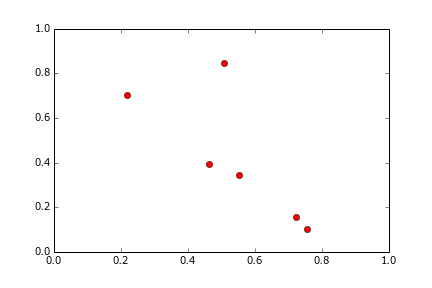
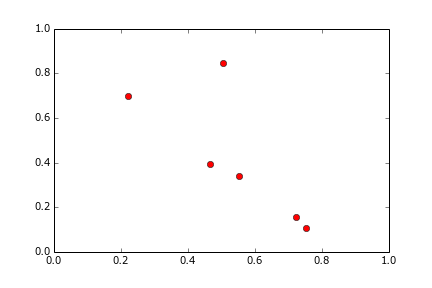
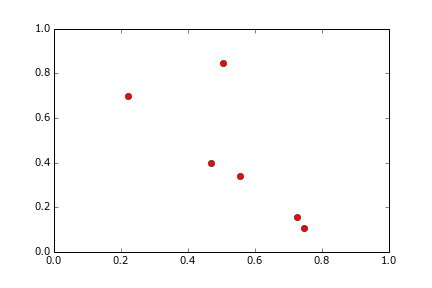
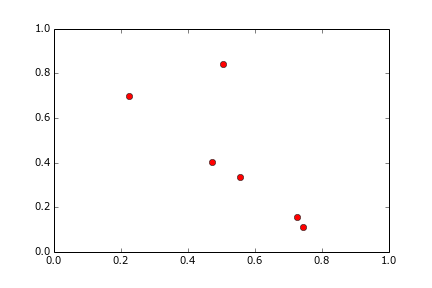
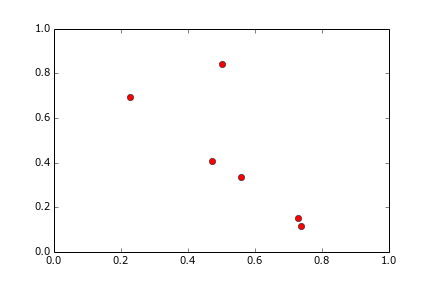
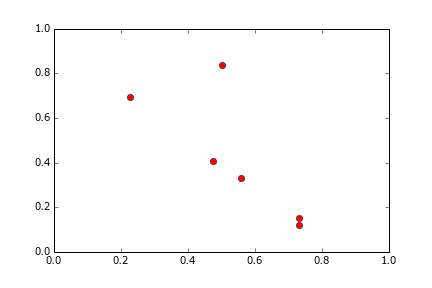
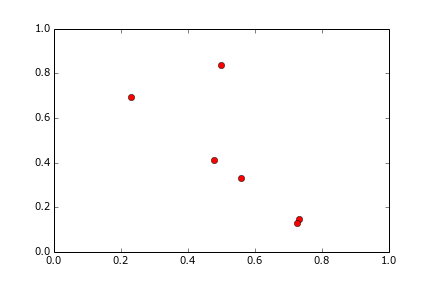
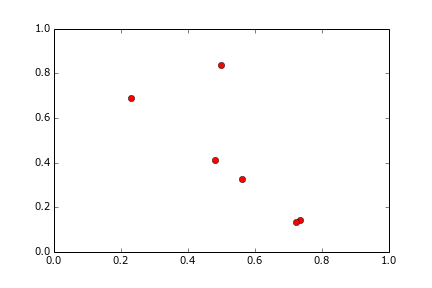
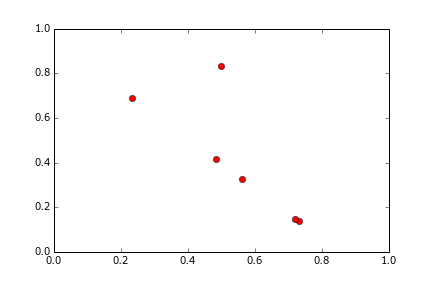
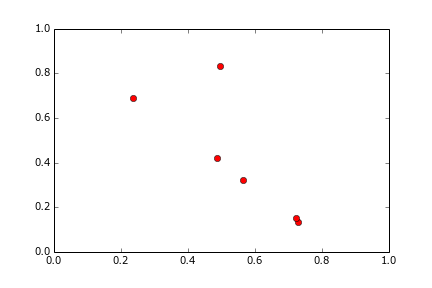
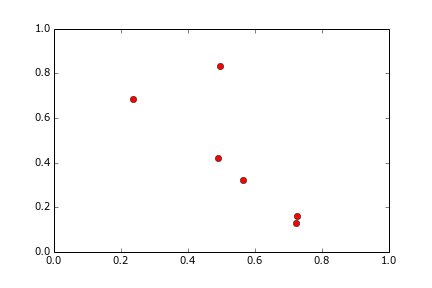
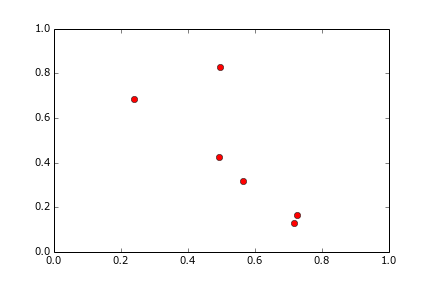
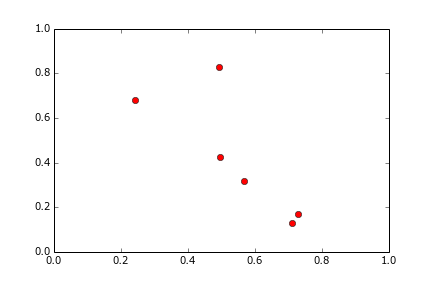
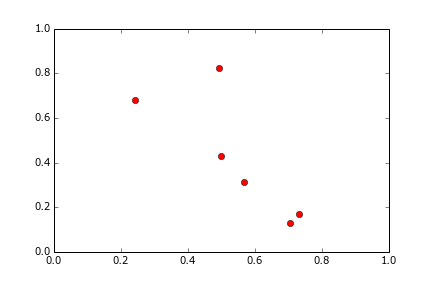
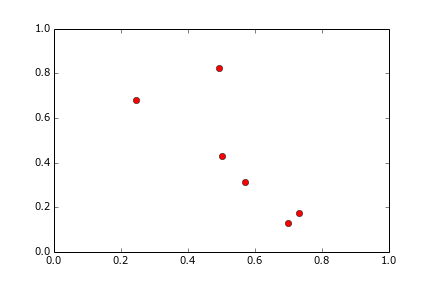
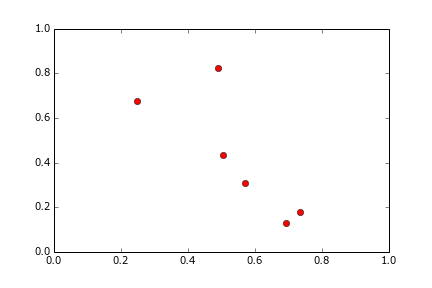
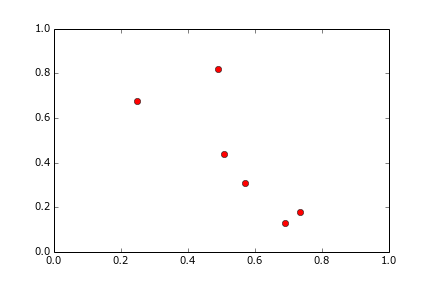
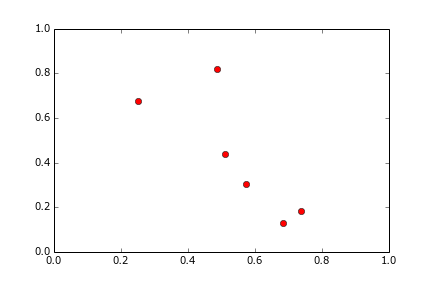
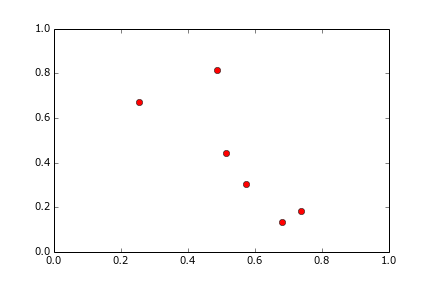
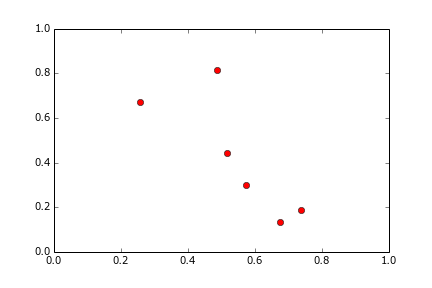
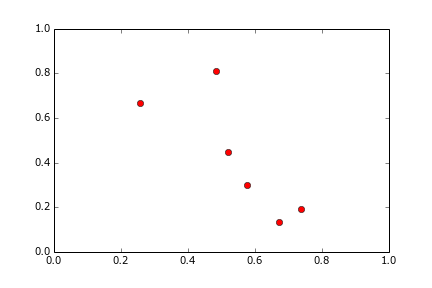
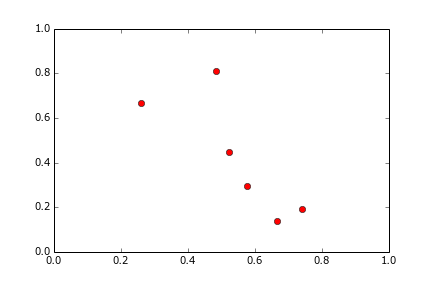
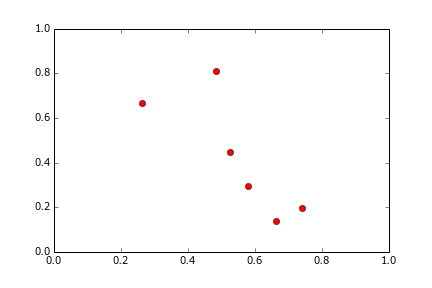
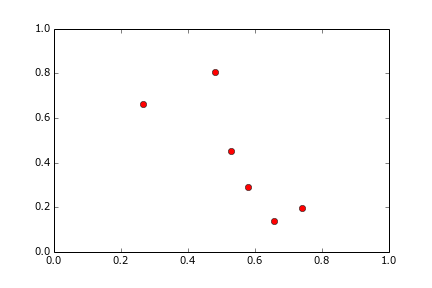
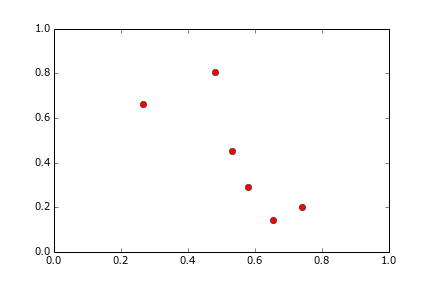
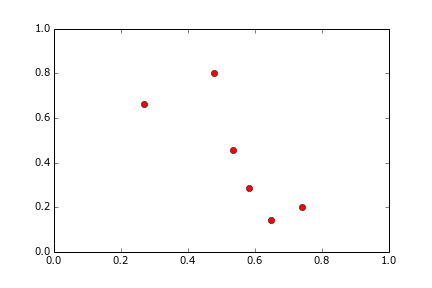
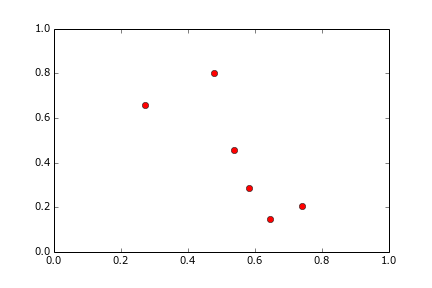
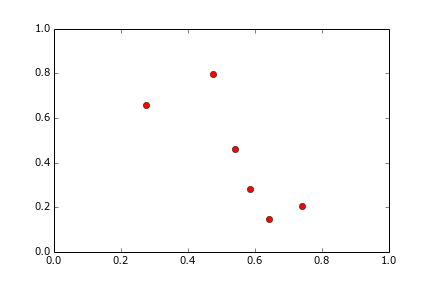
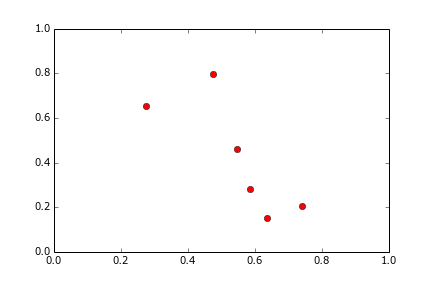
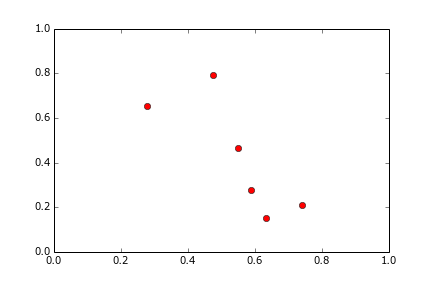
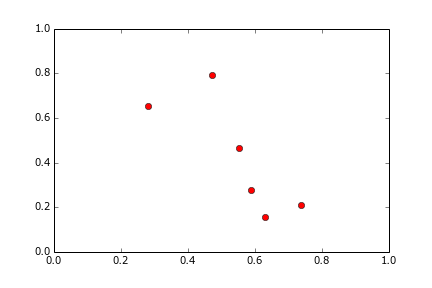
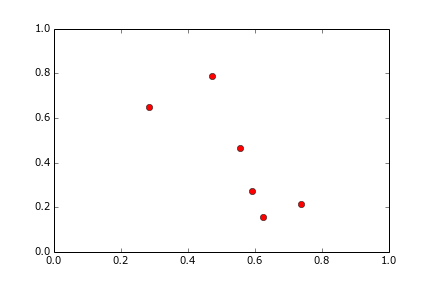
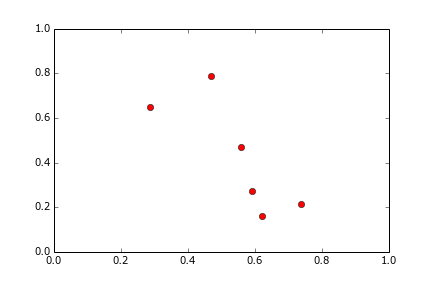
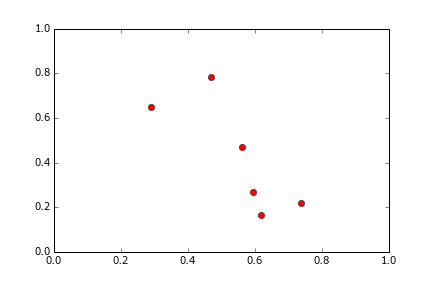
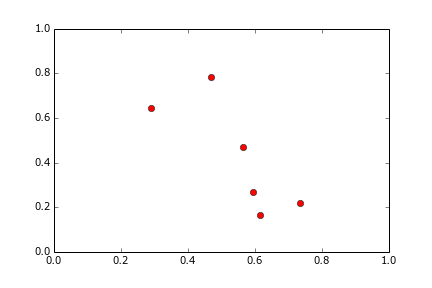
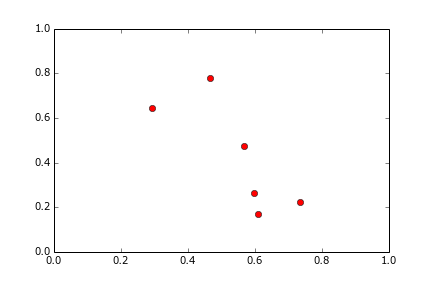
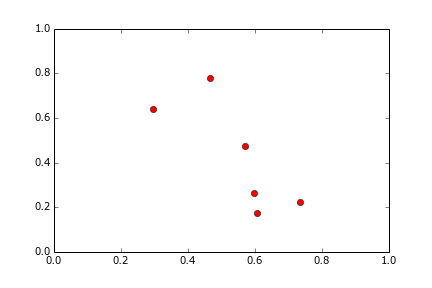
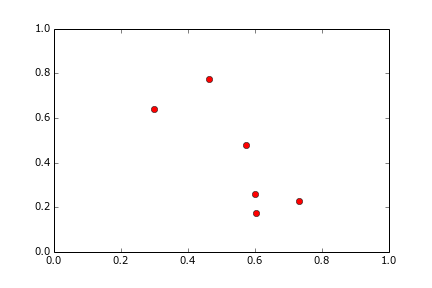
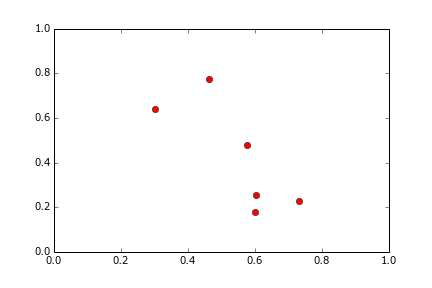
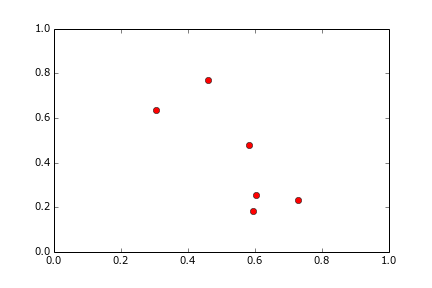
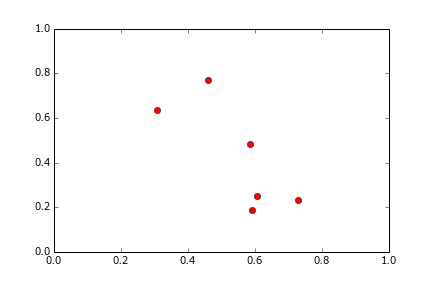
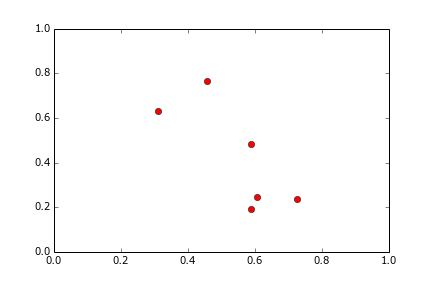
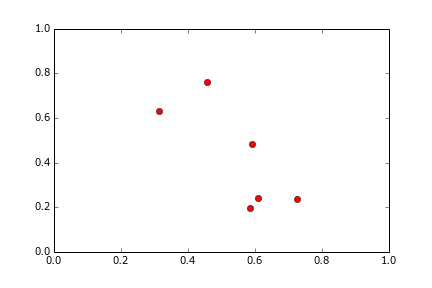
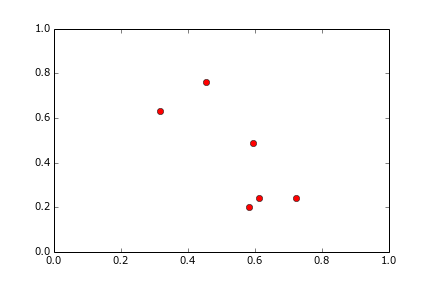
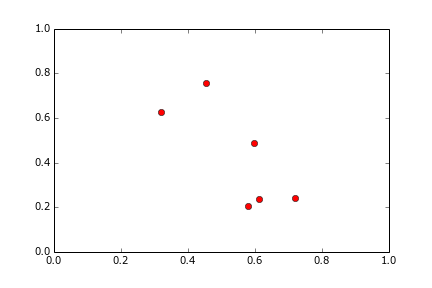
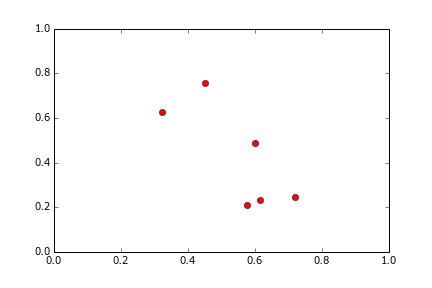
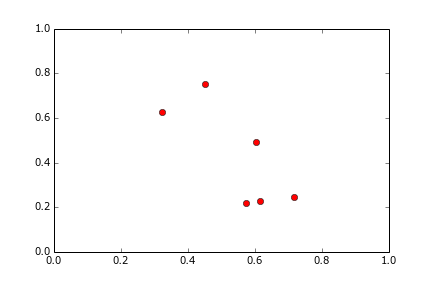
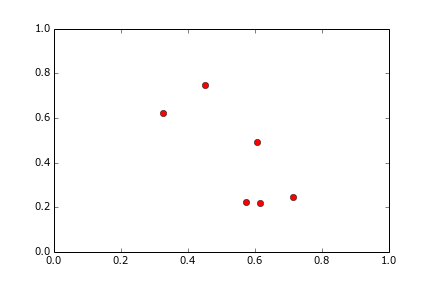
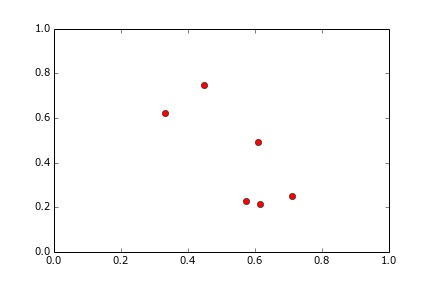
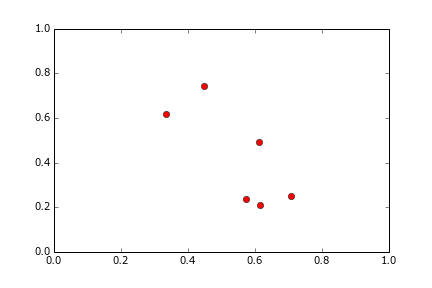
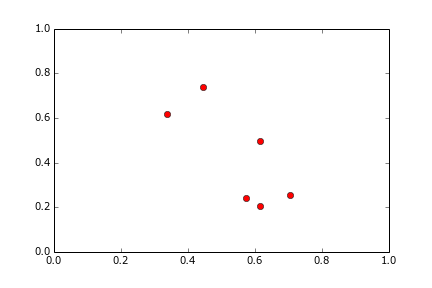
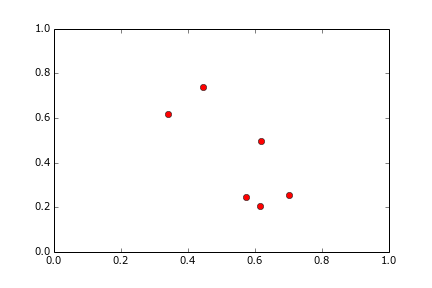
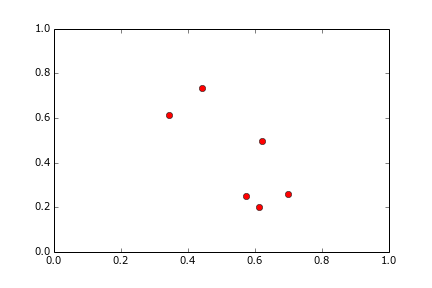
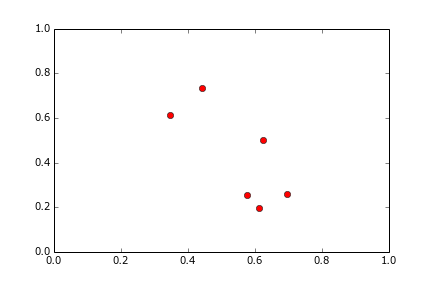
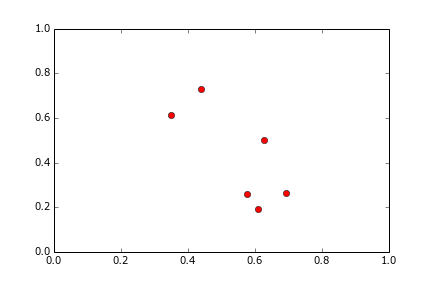
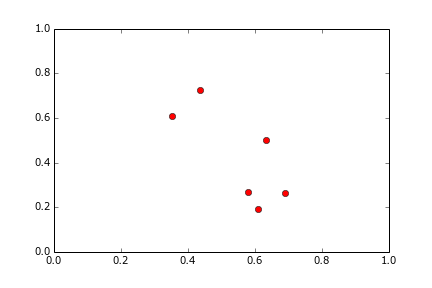
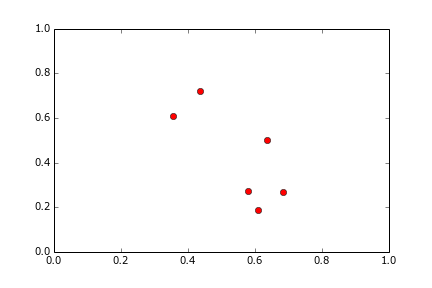
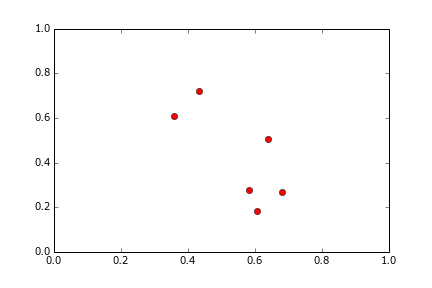
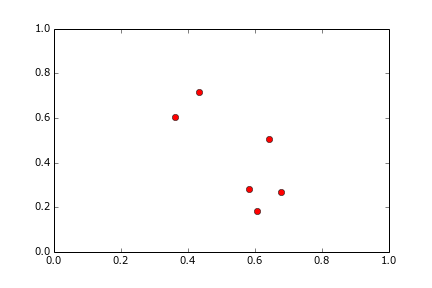
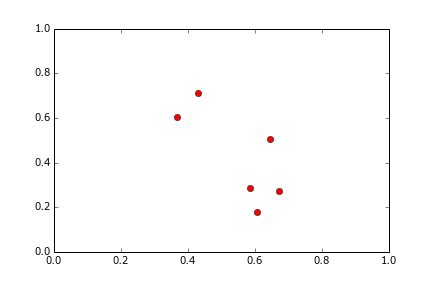
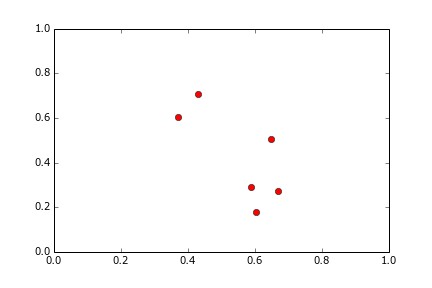
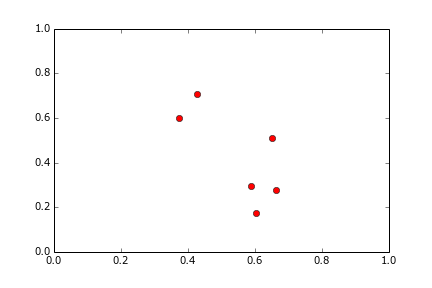
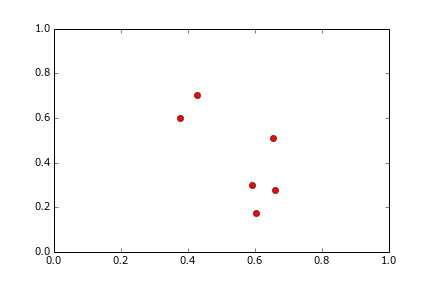
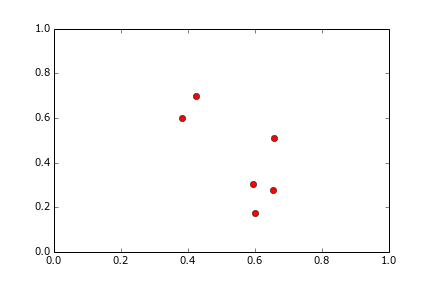
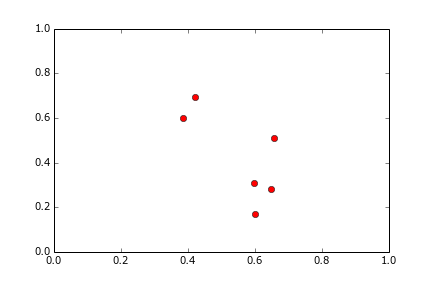
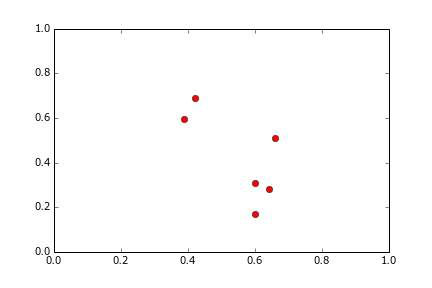
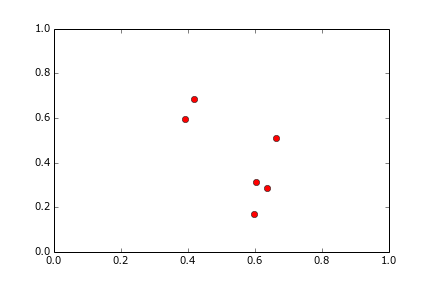
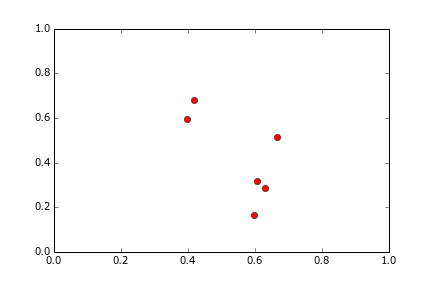
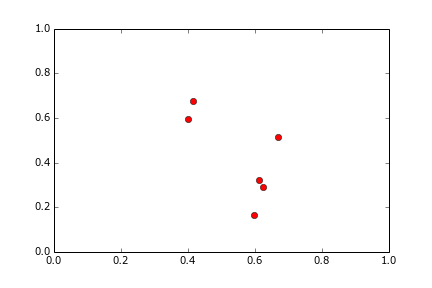
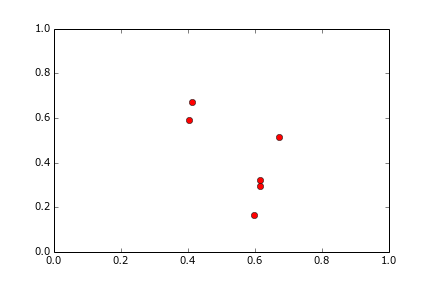
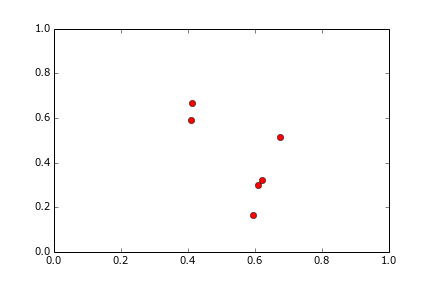
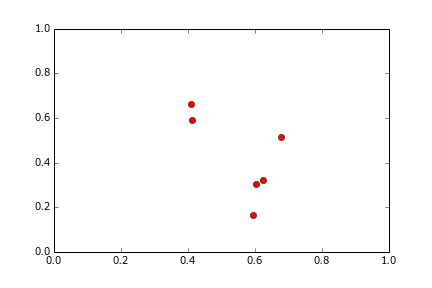
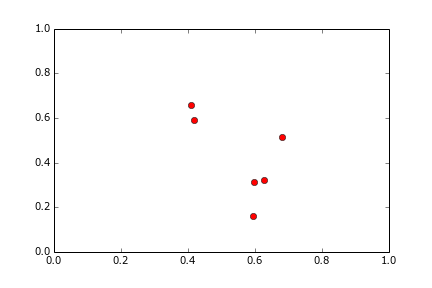
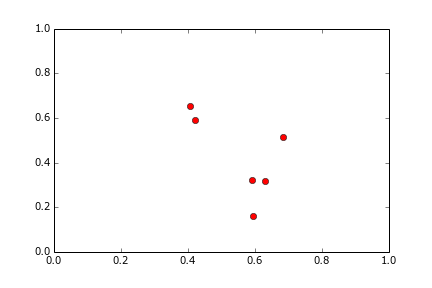
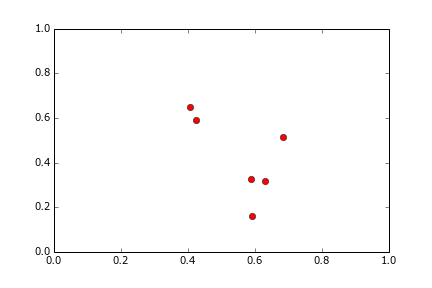
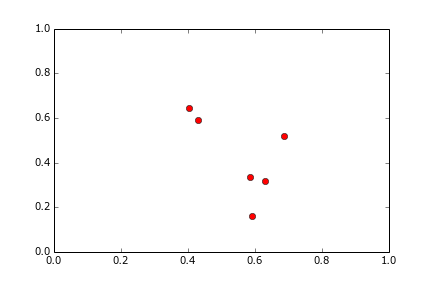
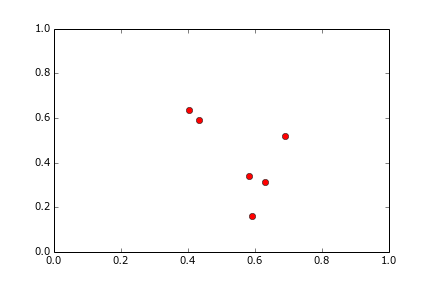
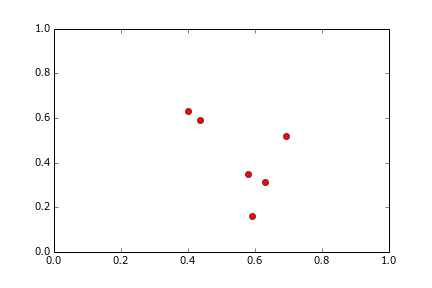
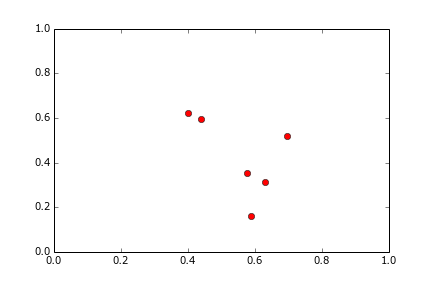
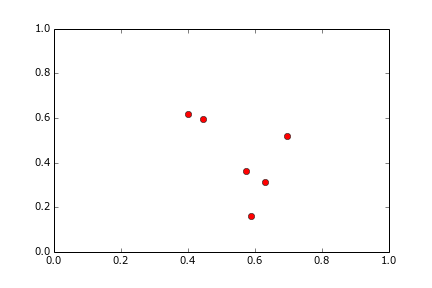
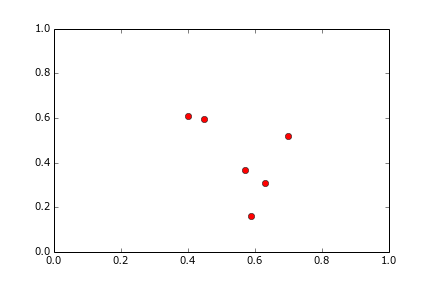
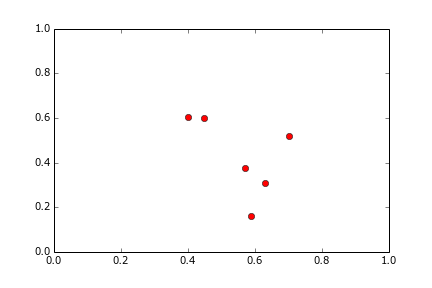
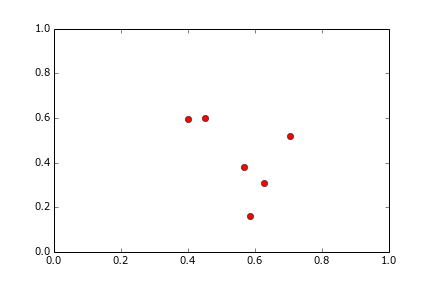
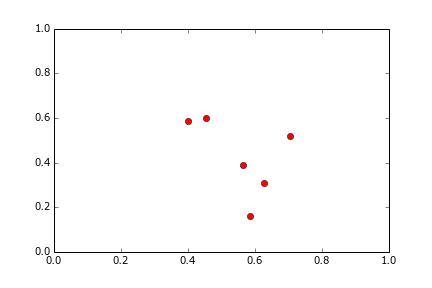
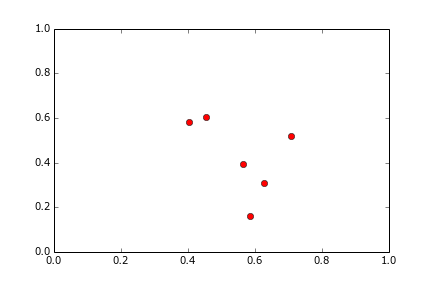
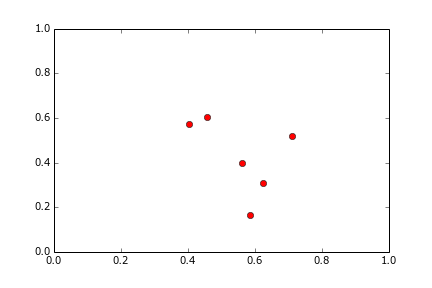
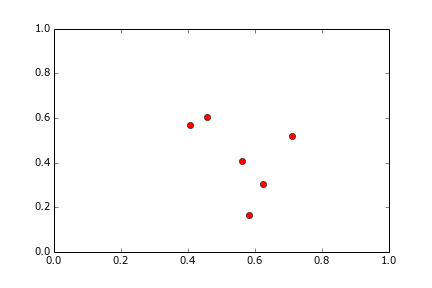
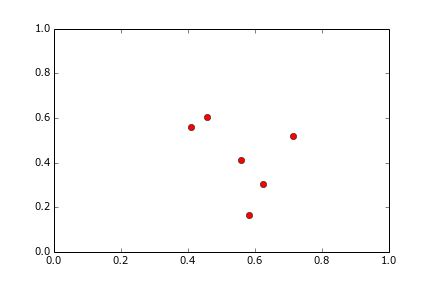
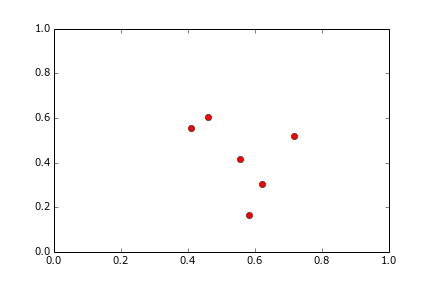
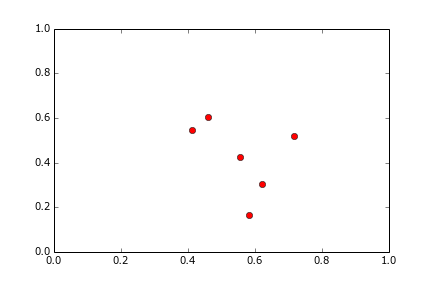
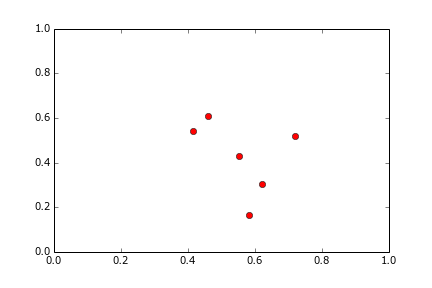
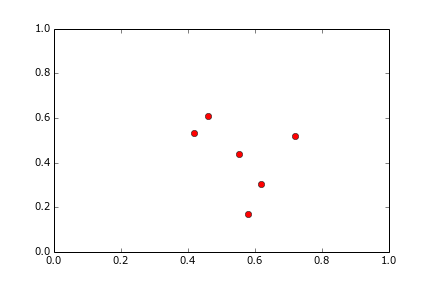
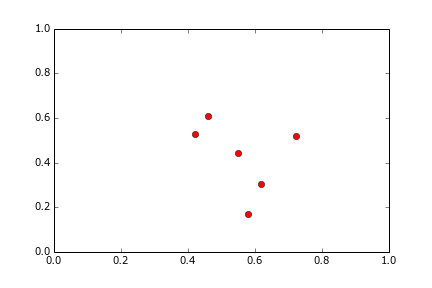
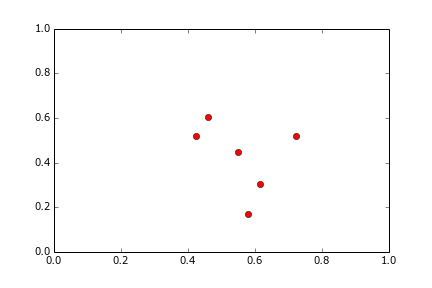
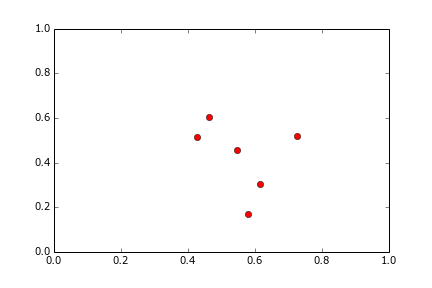
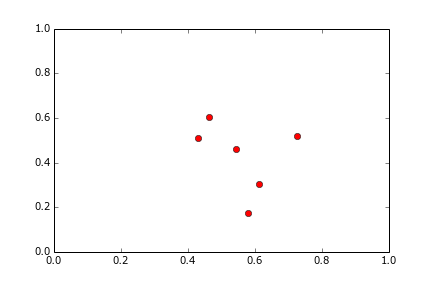
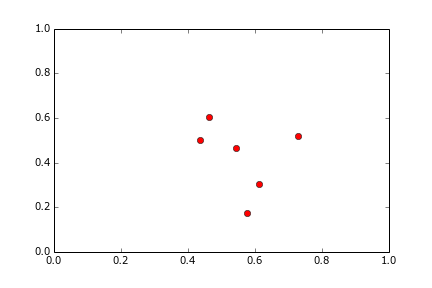
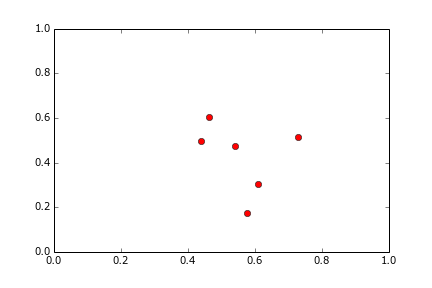
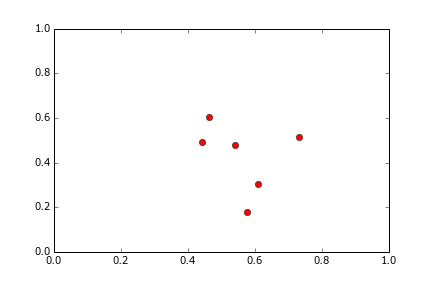
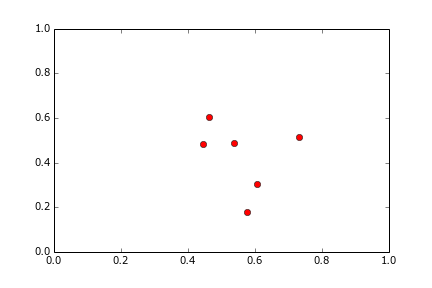
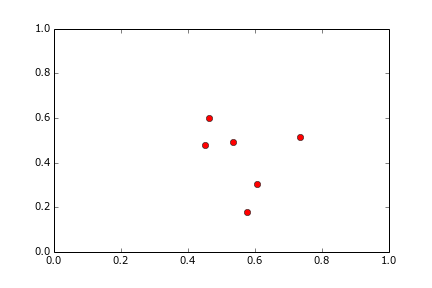
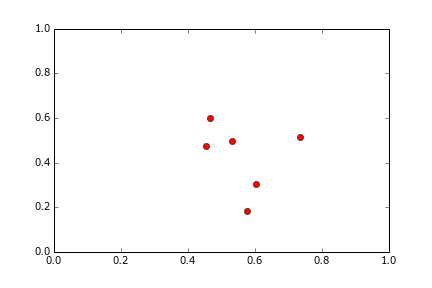
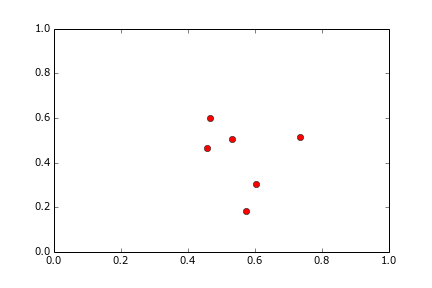
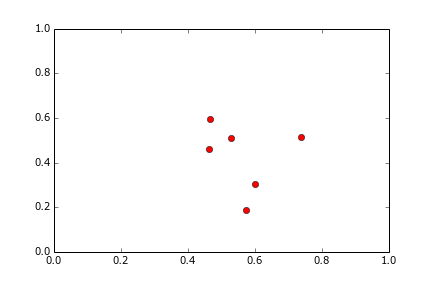
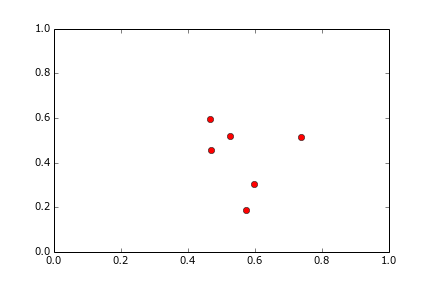
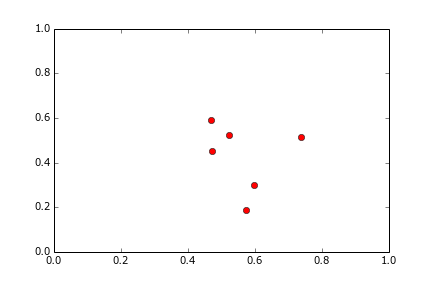
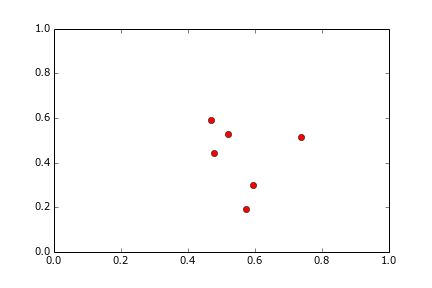
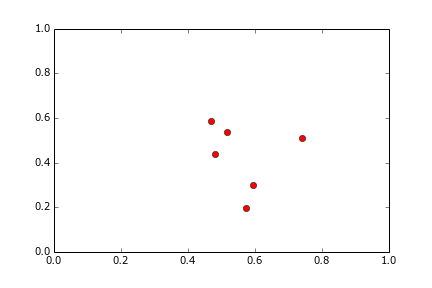
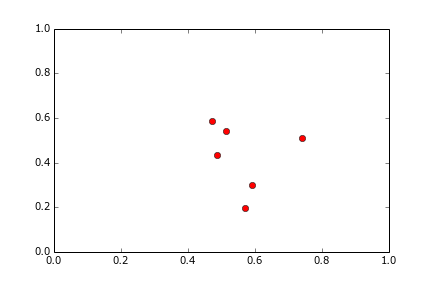
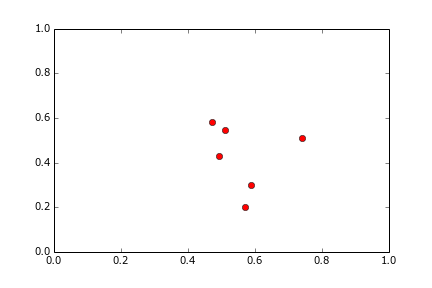
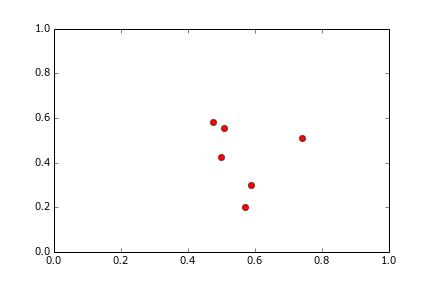
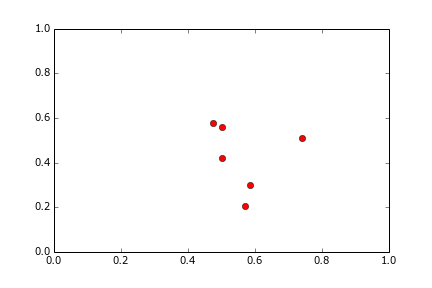
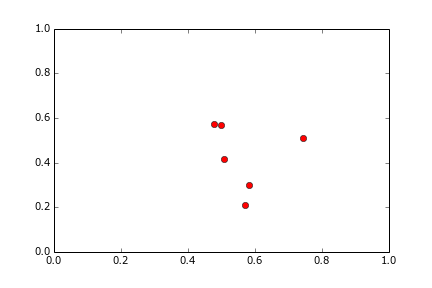
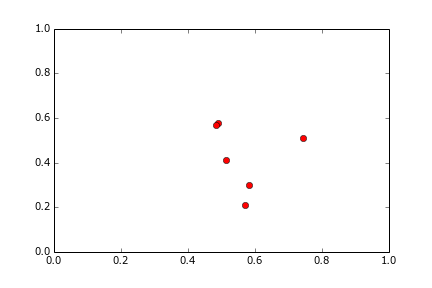
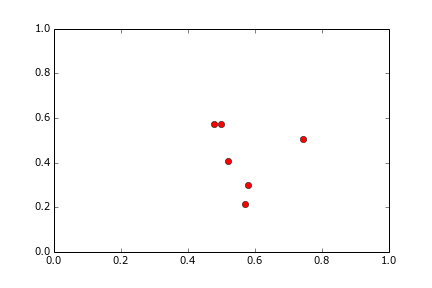
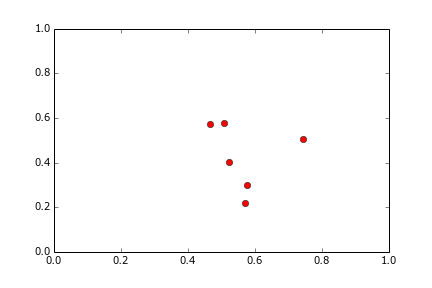
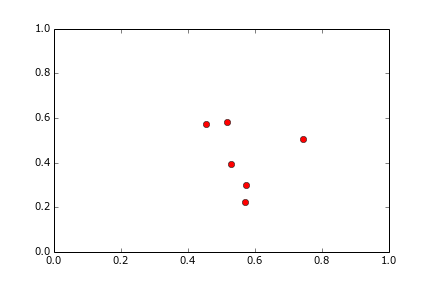
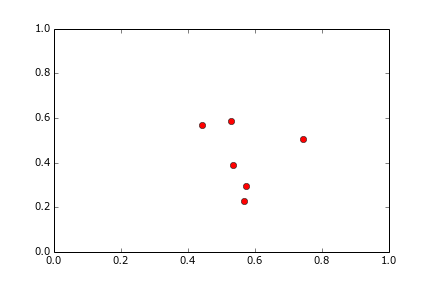
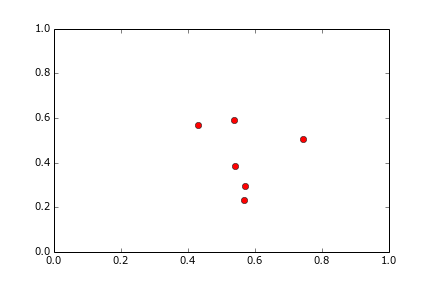
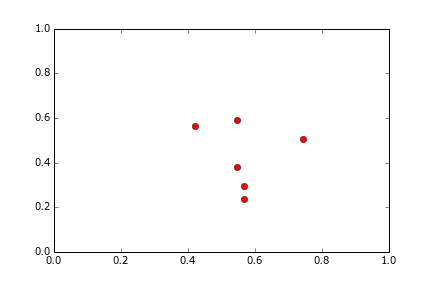
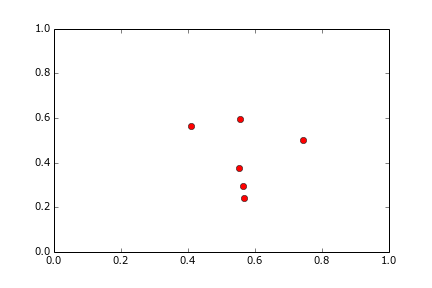
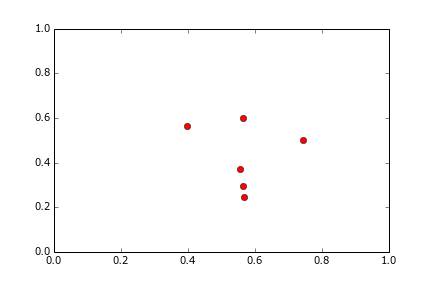
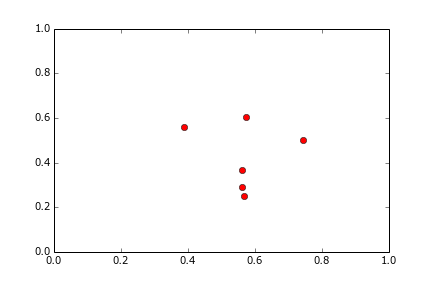
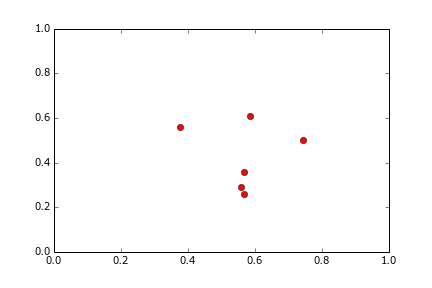
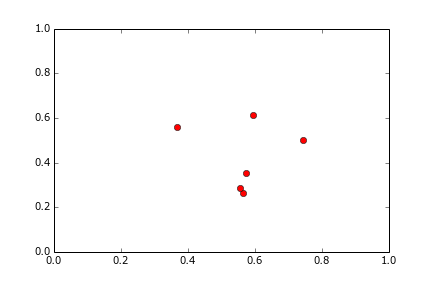
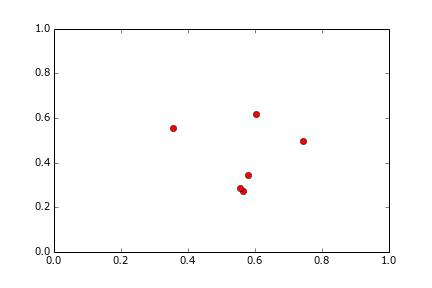
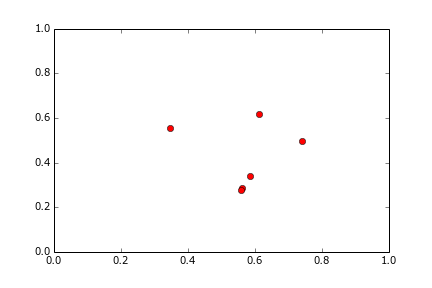
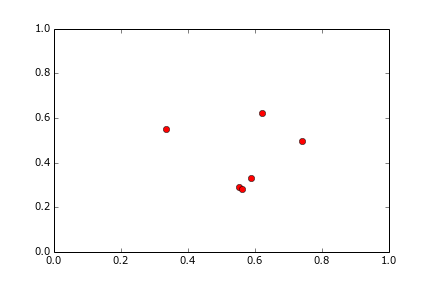
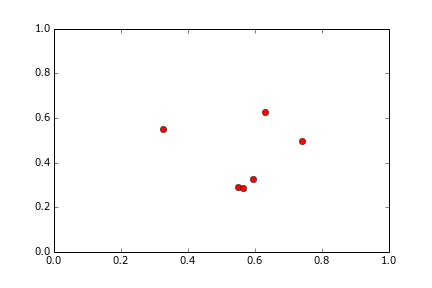
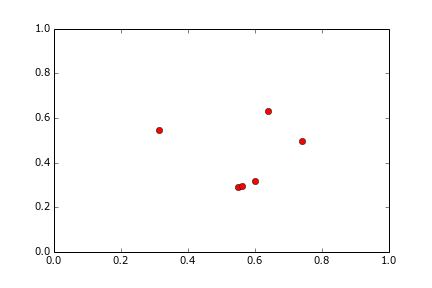
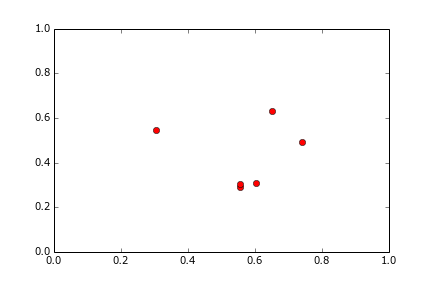
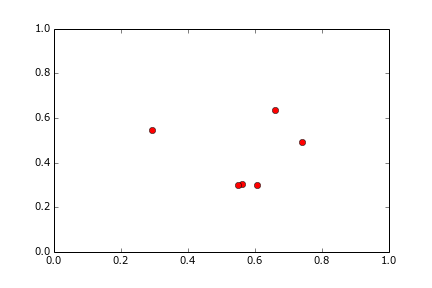
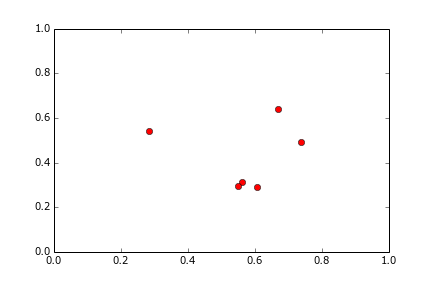
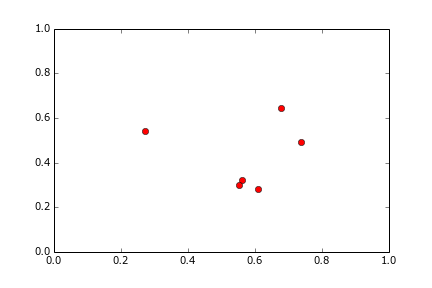
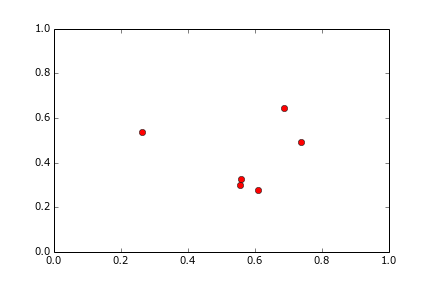
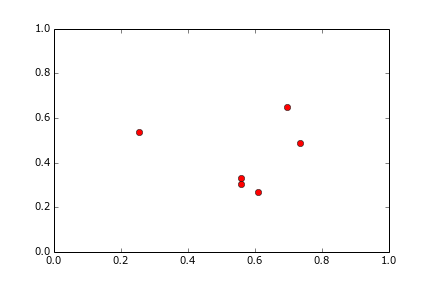
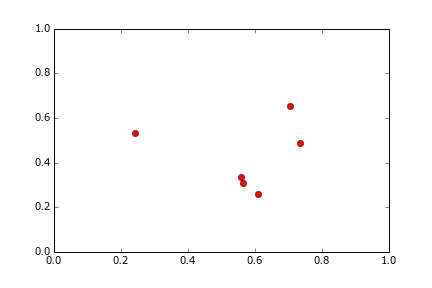
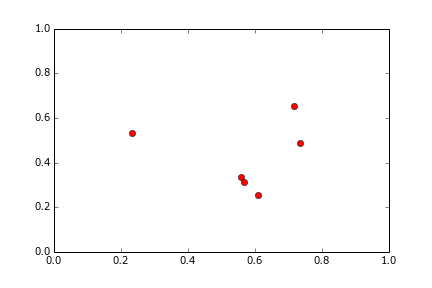
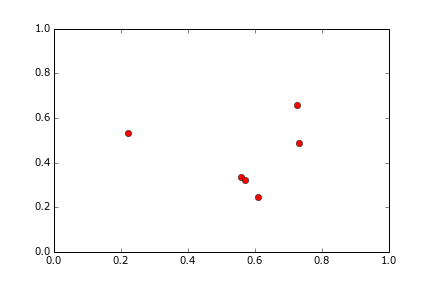
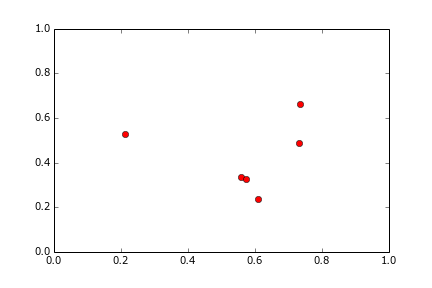
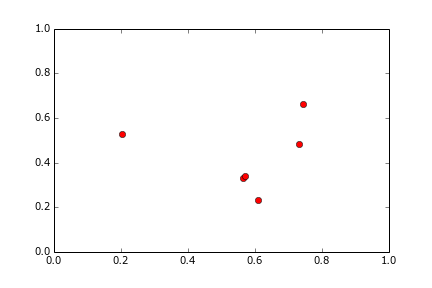
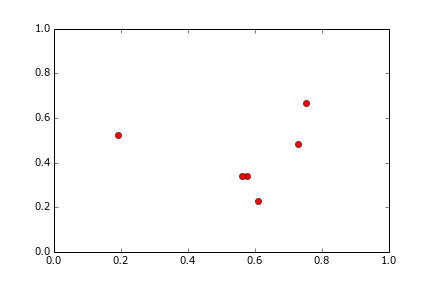
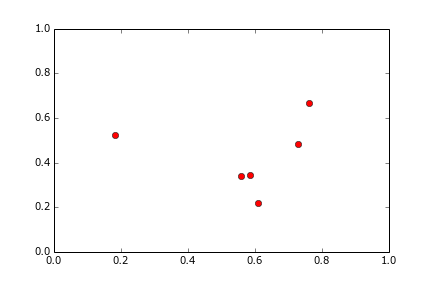
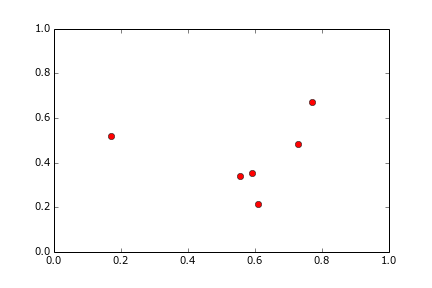
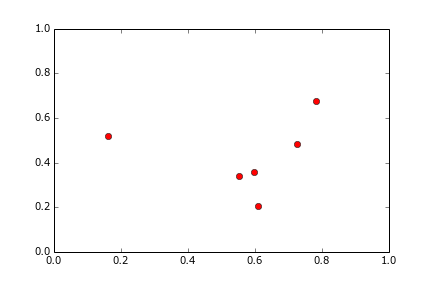
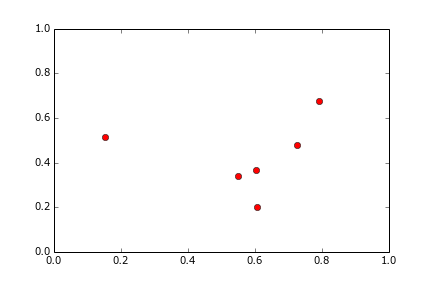
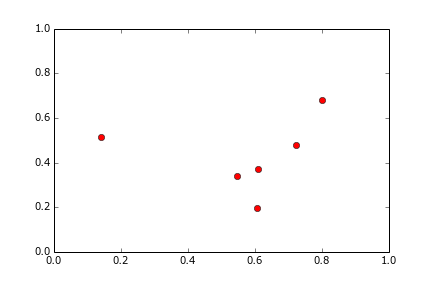
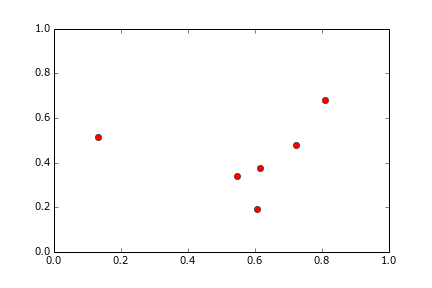
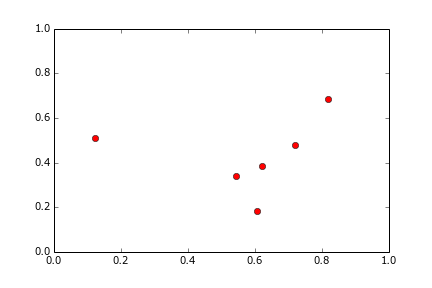
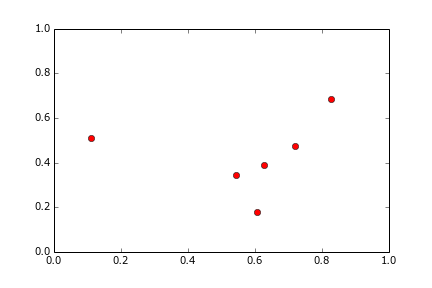
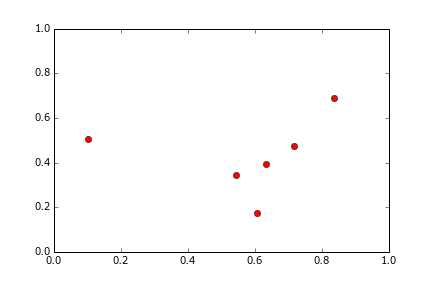
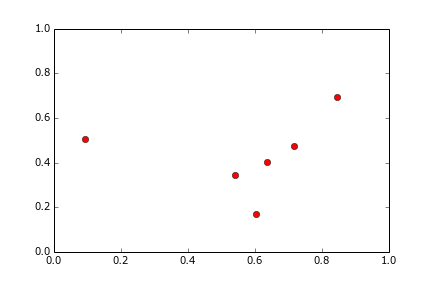
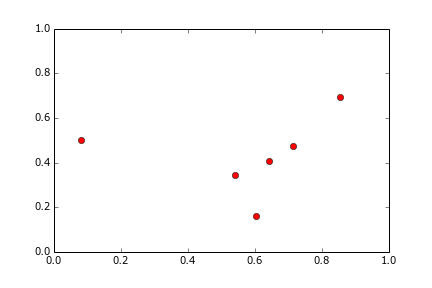
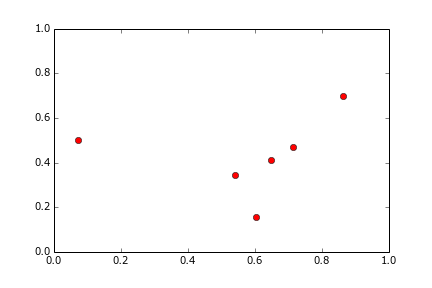

In [6]:
from matplotlib import animation
from JSAnimation import IPython_display

fig = plt.figure()
ax = plt.axes(xlim=(0, 1.0), ylim=(0, 1.0))
viewport = [0.0, 1.0, 0.0, 1.0]

N = 10
x0, v0, m = initial_cond(N, 2)

def init():
    ax.clear()
    ax.plot(x0[:,0], x0[:,1], 'ro')
    ax.quiver(x0[:,0], x0[:,1], v0[:,0], v0[:,1])
    ax.axis(viewport)
    return ax

def animate(i):
    global x0, v0
    x, v = timestep(x0, v0, 1.0, m, 1.0e-3)
    ax.clear()
    ax.plot(x[:,0], x[:,1], 'ro')
    ax.quiver(x[:,0], x[:,1], v[:,0], v[:,1])
    ax.axis(viewport)
    x0, v0 = x, v
    return ax

animation.FuncAnimation(fig, animate, frames=300, init_func=init, interval=100)

In [7]:
def simulate(N, D, S, G, dt):
    x0, v0, m = initial_cond(N, D)
    for s in range(S):
        x1, v1 = timestep(x0, v0, G, m, dt)
        x0, v0 = x1, v1

In [8]:
%%time
import time
#Ns = [2, 3, 4, 7, 10, 31, 72, 100, 1000, 10000]
#Ns = range(2, 101)
#Ns = [2, 4, 8, 20, 40, 80, 200, 400, 800, 2000]
Ns = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
#Ns = [2**x for x in range(1, 16)]
runtimes = []
for N in Ns:
    print("running", N)
    start = time.time()
    simulate(N, 3, 300, 1.0, 1e-3)
    stop = time.time()
    runtimes.append(stop - start)
print(runtimes)

running 2
running 4
running 8
running 16
running 32
running 64
running 128
running 256
running 512
running 1024
running 2048
running 4096
running 8192
[0.06021285057067871, 0.11096882820129395, 0.23926973342895508, 0.44054222106933594, 0.9077804088592529, 1.9455578327178955, 4.288378953933716, 10.082616806030273, 26.210688829421997, 74.91545248031616, 238.26748704910278, 821.0588896274567, 3222.825626850128]
CPU times: user 1h 13min 10s, sys: 7.6 s, total: 1h 13min 17s
Wall time: 1h 13min 21s


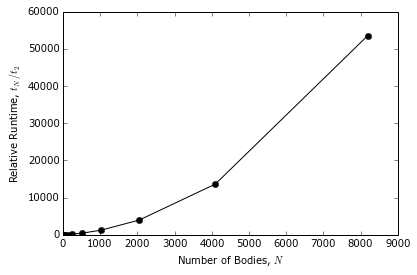

In [30]:
rts = np.array(runtimes) / runtimes[0]
plt.plot(Ns, rts, 'ko-')
plt.xlabel('Number of Bodies, $N$')
plt.ylabel('Relative Runtime, $t_N/t_2$')
plt.savefig('n-body-not-parallel-relative-runtimes.svg')

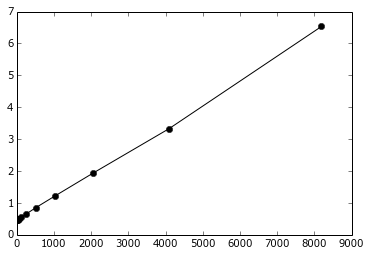

In [10]:
plt.plot(Ns, rts / Ns, 'ko-')

In [11]:
rts

array([  1.00000000e+00,   1.84294261e+00,   3.97373204e+00,
         7.31641530e+00,   1.50761906e+01,   3.23113391e+01,
         7.12203278e+01,   1.67449584e+02,   4.35300581e+02,
         1.24417714e+03,   3.95708698e+03,   1.36359412e+04,
         5.35238840e+04])

In [12]:
rts[1:] / rts[:-1]

array([ 1.84294261,  2.1561887 ,  1.84119493,  2.06059798,  2.14320315,
        2.20418992,  2.35114875,  2.59959189,  2.85820235,  3.18048519,
        3.44595438,  3.92520642])

In [13]:
[2**x for x in range(1, 16)]

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]

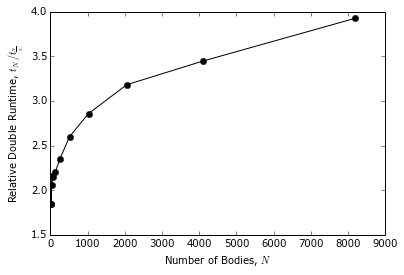

In [32]:
plt.plot(Ns[1:], rts[1:] / rts[:-1], 'ko-')
plt.xlabel('Number of Bodies, $N$')
plt.ylabel('Relative Double Runtime, $t_N/t_{\\frac{N}{2}}$')
plt.savefig('n-body-not-parallel-double-runtimes.svg')

In [33]:
Ns[5], runtimes[5]

(64, 1.9455578327178955)